In [1]:
#library imports
import pandas as pd
import numpy as np

In [2]:
#function and model imports
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

/home/mallik/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
def df_shuffle(inp):
    inp=shuffle(inp)
    inp=inp.reset_index(drop=True)
    return inp

In [69]:
train_data=pd.read_csv('../Data/train_LZdllcl.csv')
test_data=pd.read_csv('../Data/test_2umaH9m.csv')
print(train_data.shape)
print(test_data.shape)
#tr_data

(54808, 14)
(23490, 13)


In [70]:
train_data=df_shuffle(train_data)

In [71]:
t=train_data.isnull().sum()
t[t>0]

education               2409
previous_year_rating    4124
dtype: int64

In [72]:
def process_categorical(train):    #use this after removing target variable
    #fulldata=pd.concat([train,test],axis=0)
    fulldata=train
    fulldata=fulldata.fillna(-1)
    trainend=len(train)
    onecoded=pd.get_dummies(fulldata)
    return (onecoded)

In [76]:
xtrainfull =process_categorical(train_data)
xnoregion = train_data.drop('region',axis=1)
xnoregion = process_categorical(xnoregion)

In [10]:
xtrainfull['is_promoted'].value_counts()[1]/xtrainfull['is_promoted'].value_counts()[0]

0.09309932189868368

In [86]:
def bar_custom(xdata,ydata,hline,ax,col):
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    ax.bar(xdata,ydata, align='center', alpha=0.5,width=0.5,color=col)
    #ax.plot( xdata, ydata, marker='.', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
   
    plt.xticks(rotation = 90)

    ax.axhline(hline, color="grey")
    ax.text(1.02,hline,hline, va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5),
            transform=ax.get_yaxis_transform())
    
    #plt.legend(loc='best')
    #plt.show()
    return
    #plt.show()    

In [87]:
def plotratio(data,variable,target,pos,neg,axis):
    ser,quant_bins = pd.qcut(data[variable],100,retbins=True,labels=False,duplicates='drop')
    quant_interval = pd.qcut(data[variable],100,duplicates='drop').values.categories
    
    if(len(quant_bins)==2):
        left=np.copy(quant_bins)
        left[1]=left[0]+0.4
        left[0]=left[0]-0.01

        right=np.copy(quant_bins)
        right[0]=left[1]
        right[1]=right[1]+0.1
        quant_interval = pd.IntervalIndex.from_arrays(left,right)
        l=list(quant_bins)
        l.append(l[1]+0.1)
        l[1]=l[0]+0.4
        quant_bins=np.array(l)
    
    
    pos_freq,_ = np.histogram(data[data[target]==pos][variable],bins=quant_bins)
    neg_freq,_ = np.histogram(data[data[target]==neg][variable],bins=quant_bins)
    ratio_freq = neg_freq/pos_freq
    intvl_str=[str(x) for x in quant_interval]
    
    bar_custom(intvl_str,ratio_freq,0.093,axis,'blue')
    return ratio_freq


In [88]:
def plotsum(data,variable,target,pos,neg,axis):
    ser,quant_bins = pd.qcut(data[variable],100,retbins=True,labels=False,duplicates='drop')
    quant_interval = pd.qcut(data[variable],100,duplicates='drop').values.categories

    if(len(quant_bins)==2):
        left=np.copy(quant_bins)
        left[1]=left[0]+0.4
        left[0]=left[0]-0.01

        right=np.copy(quant_bins)
        right[0]=left[1]
        right[1]=right[1]+0.1
        quant_interval = pd.IntervalIndex.from_arrays(left,right)
        l=list(quant_bins)
        l.append(l[1]+0.1)
        l[1]=l[0]+0.4
        quant_bins=np.array(l)    
    
    pos_freq,_ = np.histogram(data[data[target]==pos][variable],bins=quant_bins)
    neg_freq,_ = np.histogram(data[data[target]==neg][variable],bins=quant_bins)
    sum_freq = neg_freq+pos_freq
    sum_freq = sum_freq/54000
    intvl_str=[str(x) for x in quant_interval]
    
    bar_custom(intvl_str,sum_freq,0.0,axis,'orange')
    return sum_freq


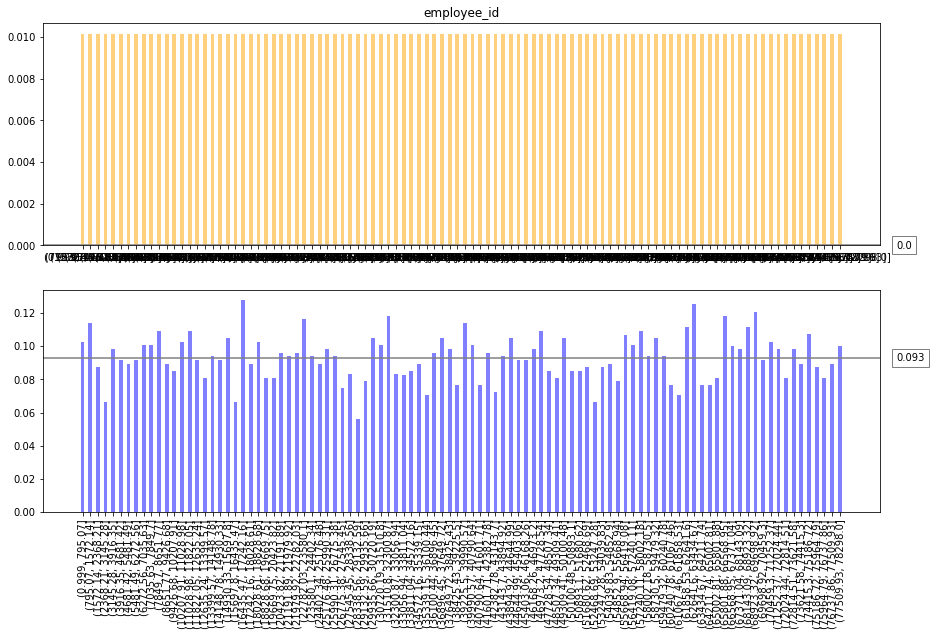

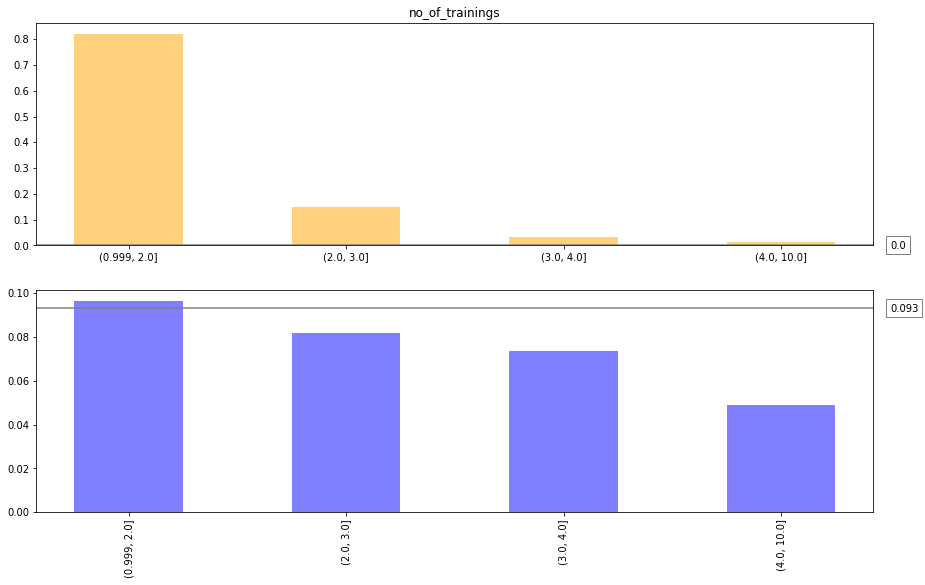

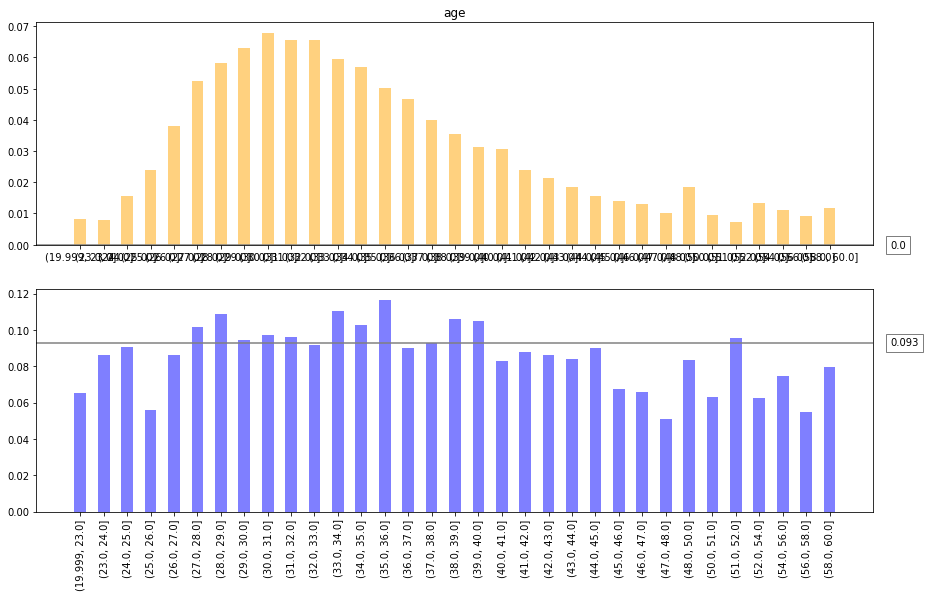

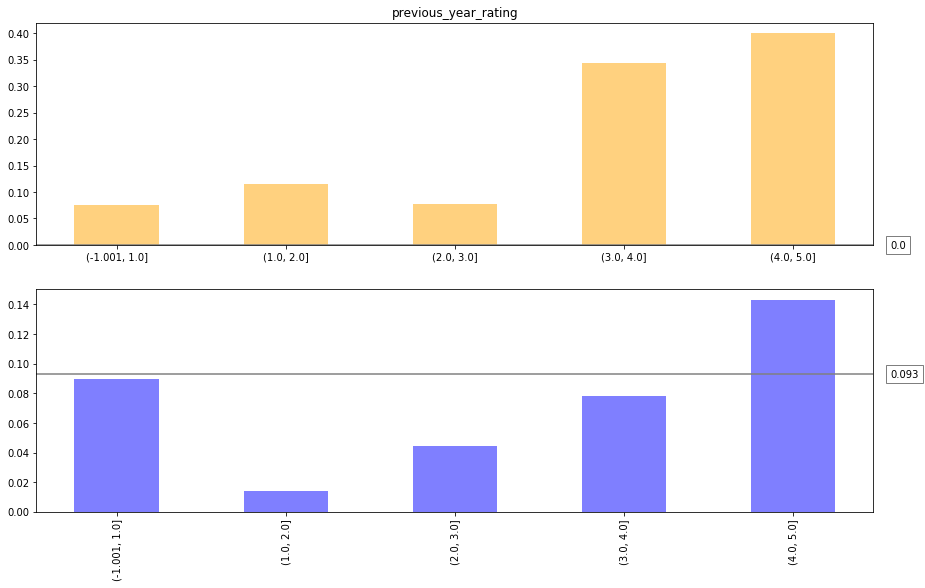

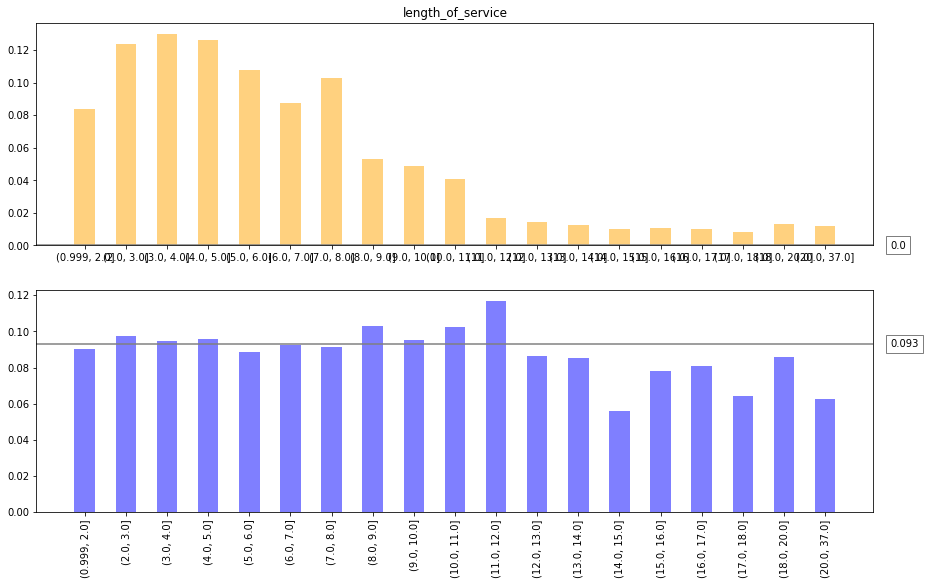

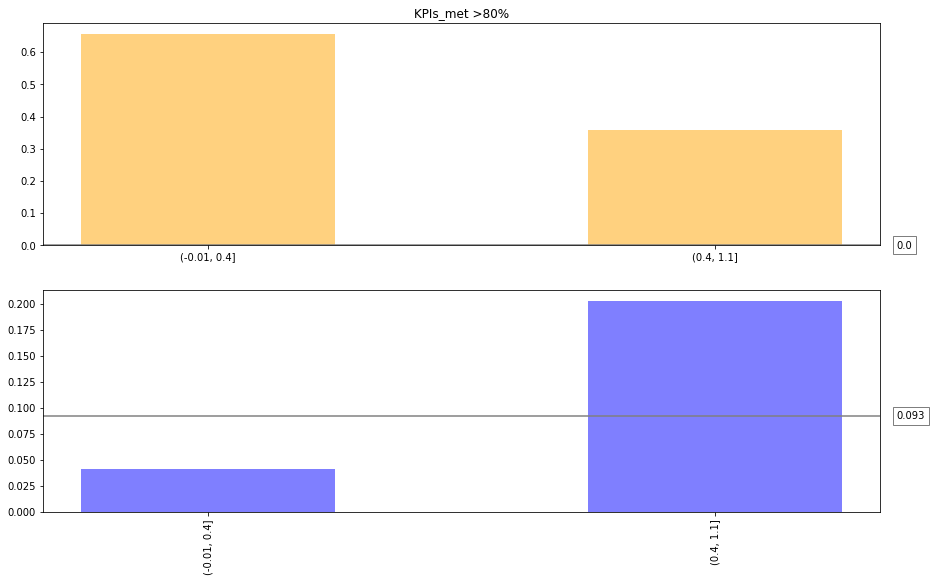

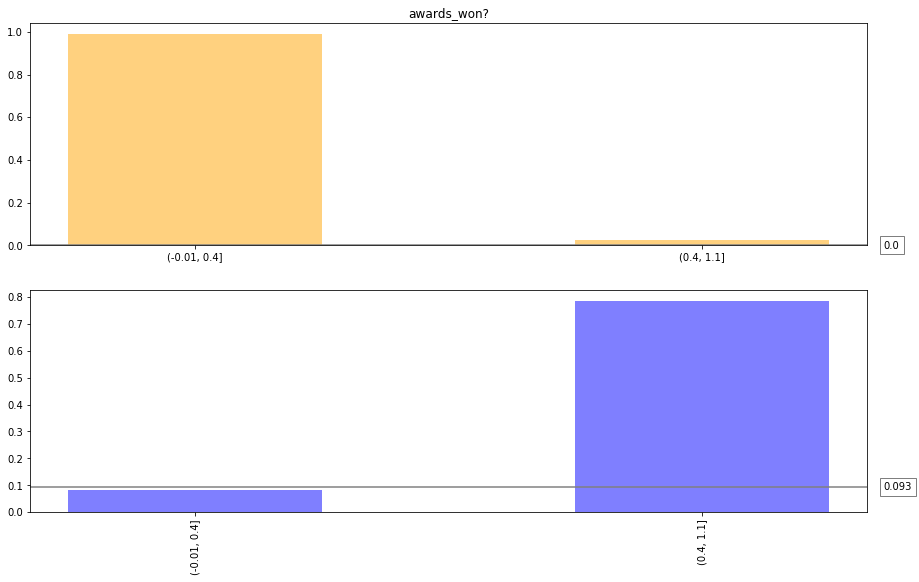

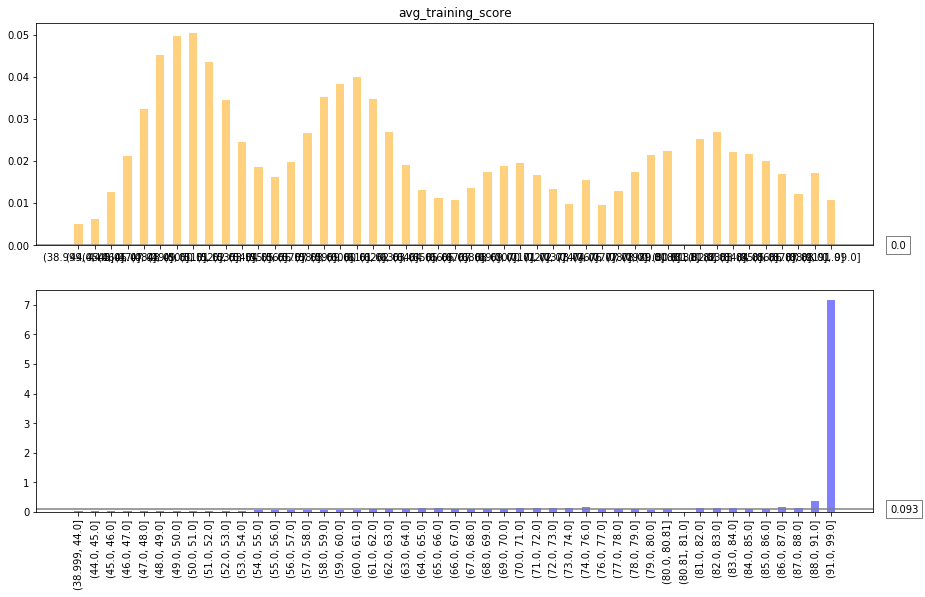

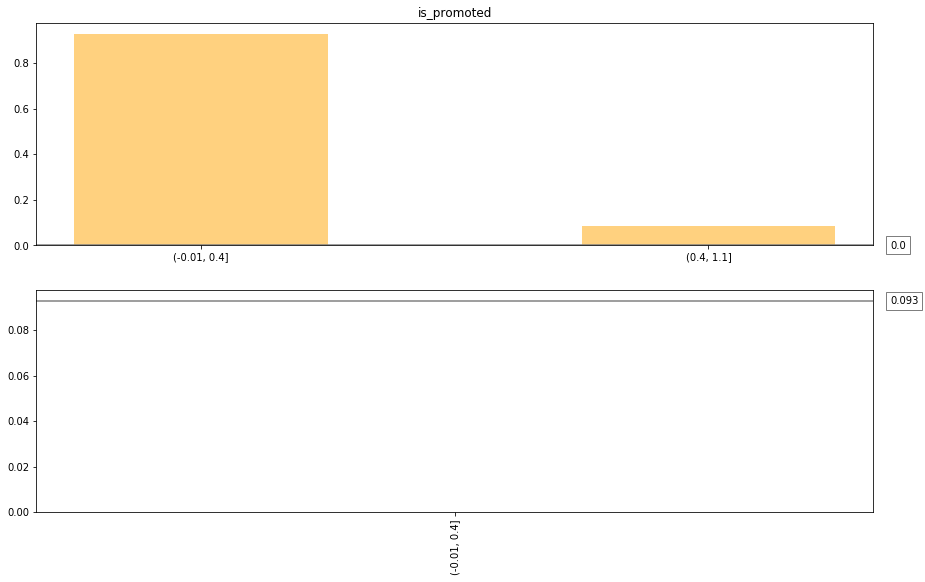

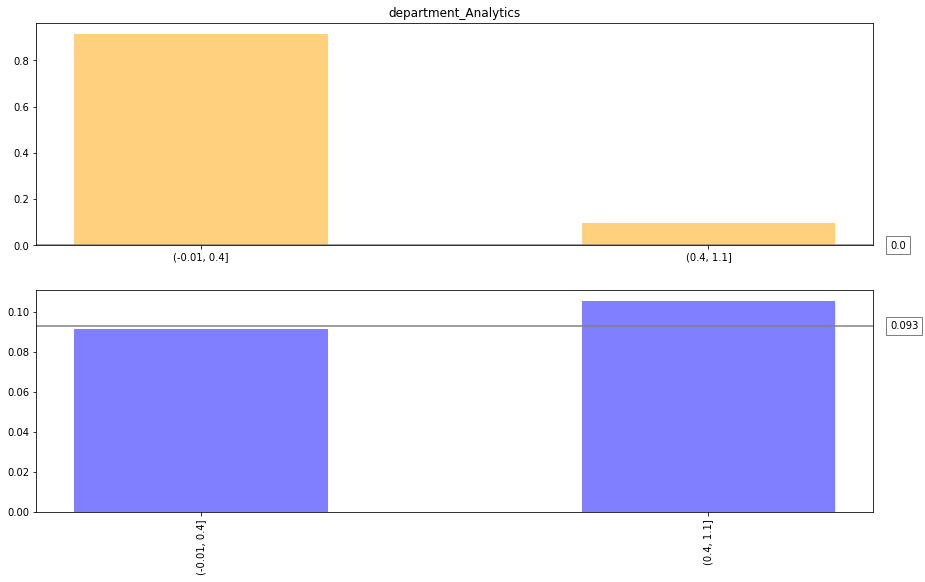

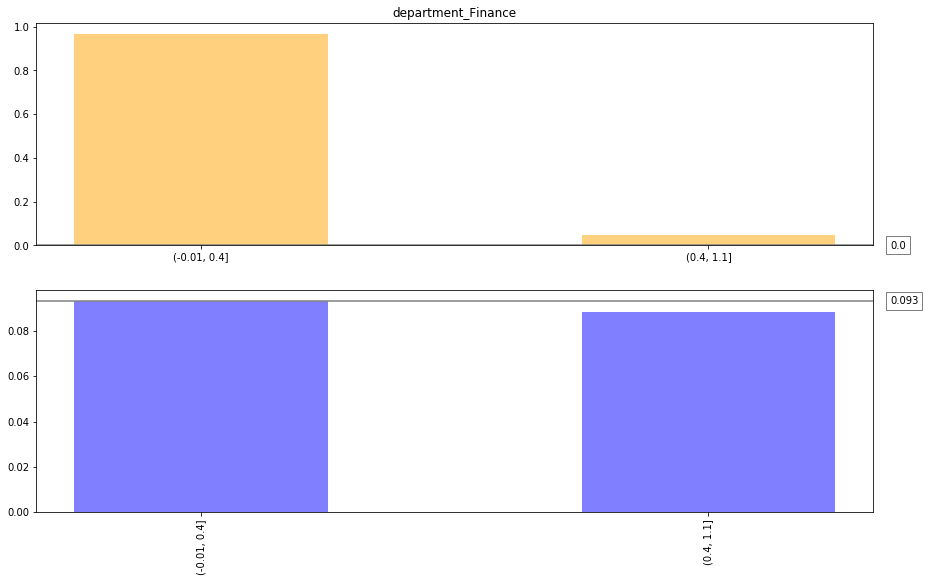

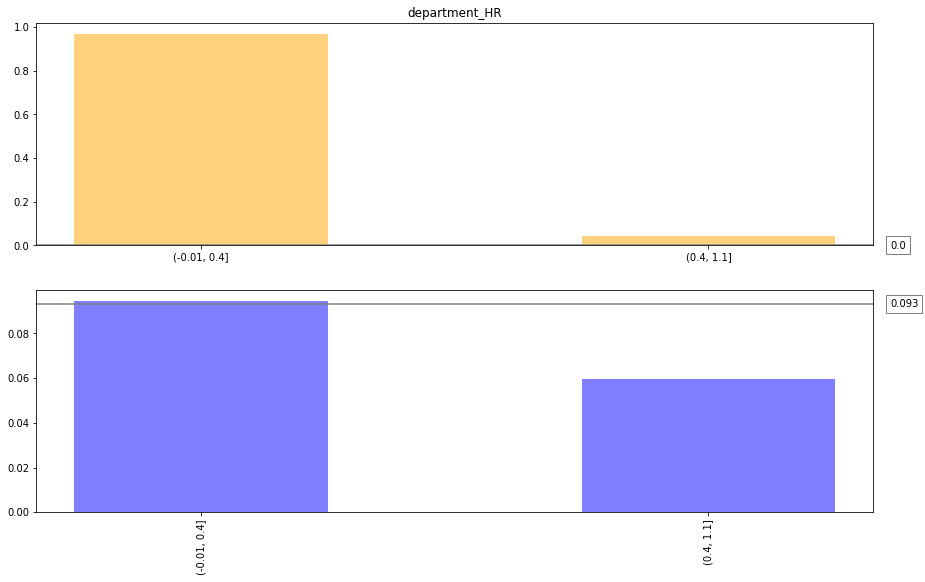

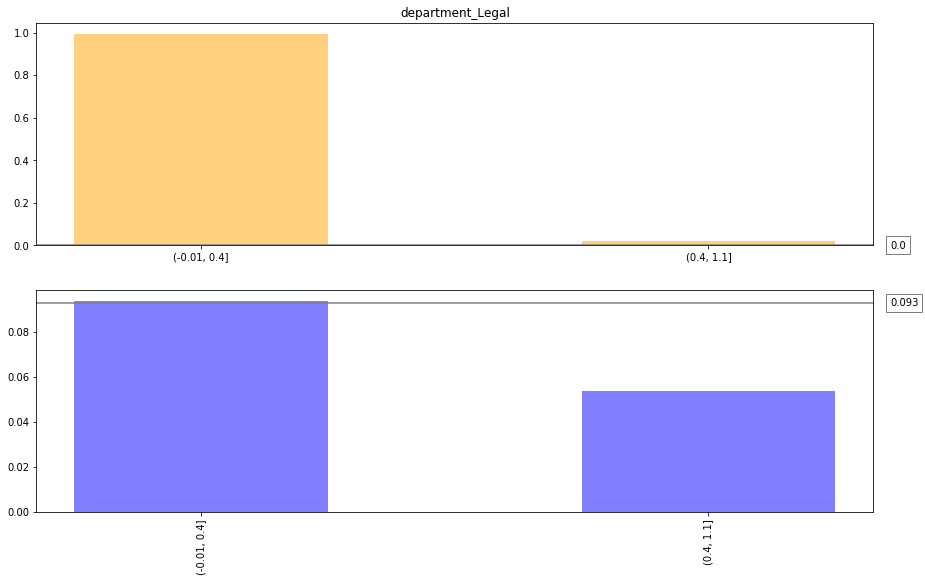

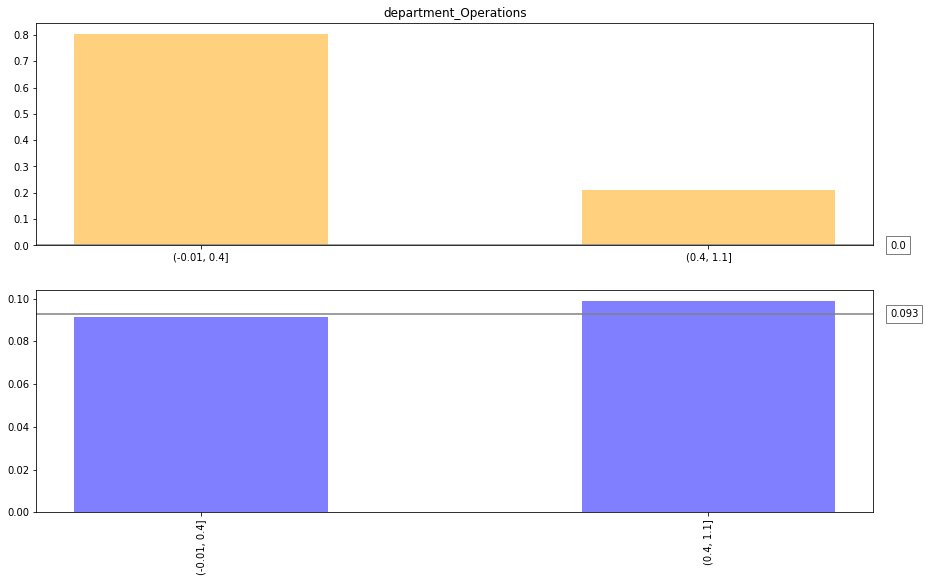

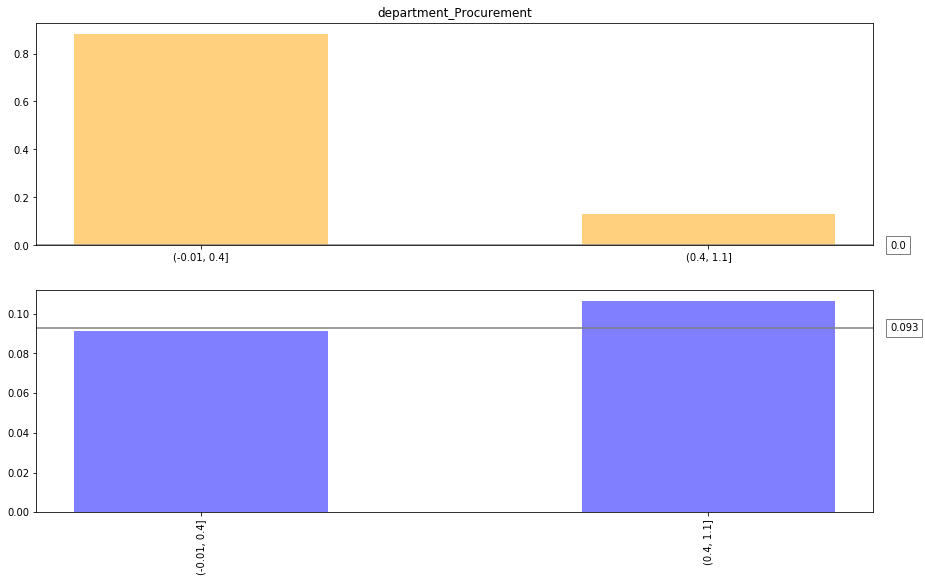

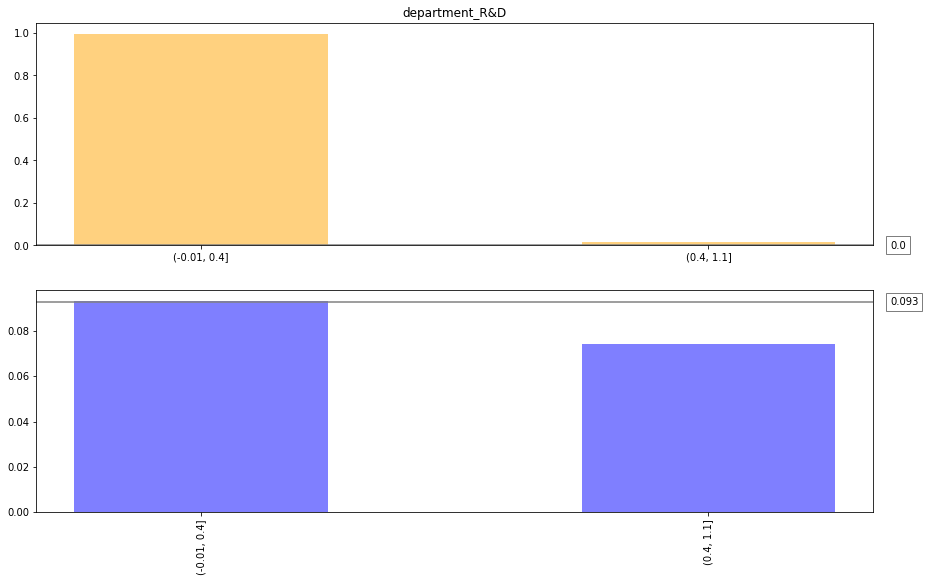

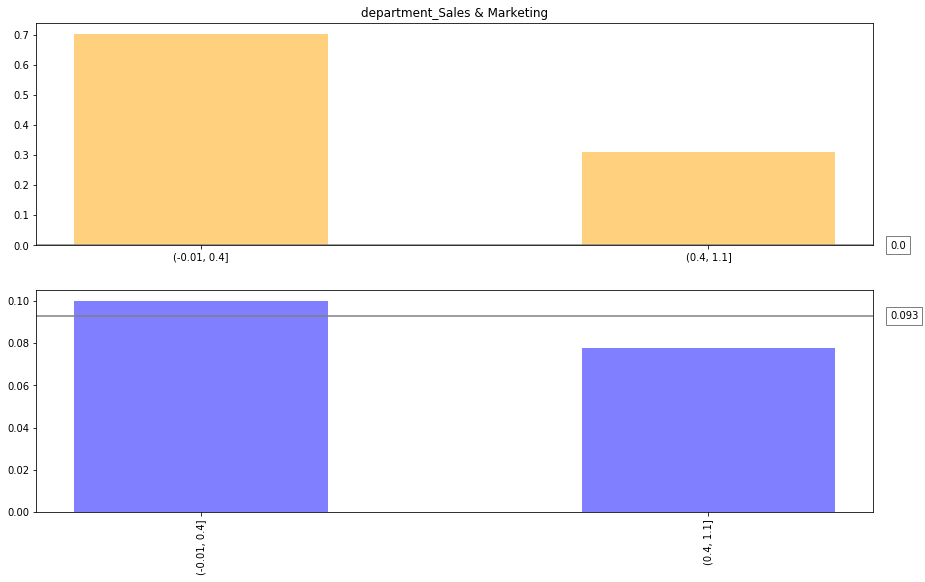

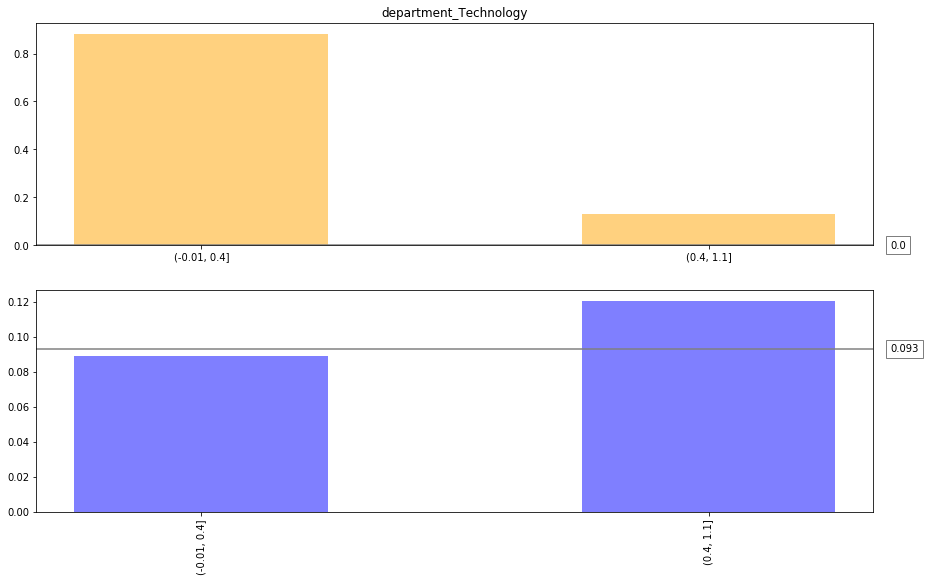

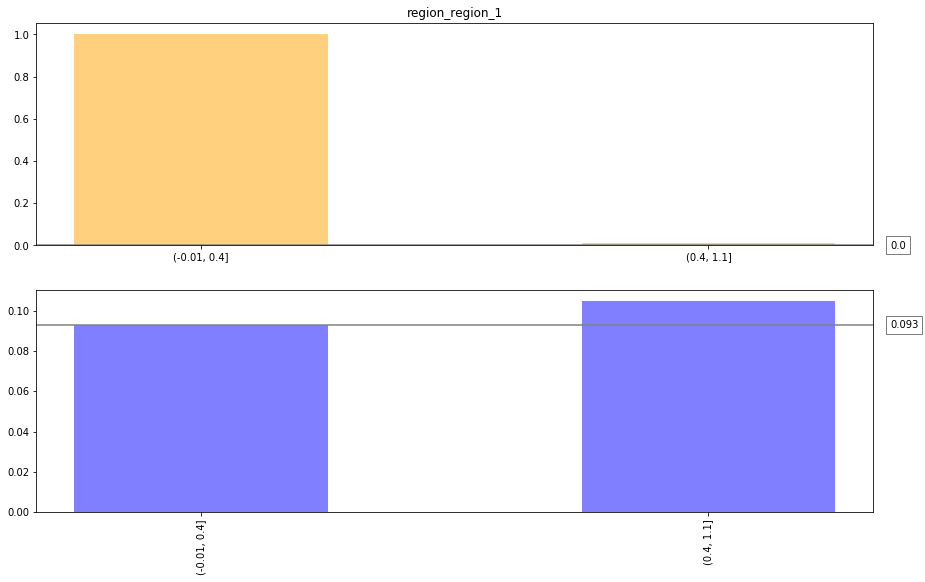

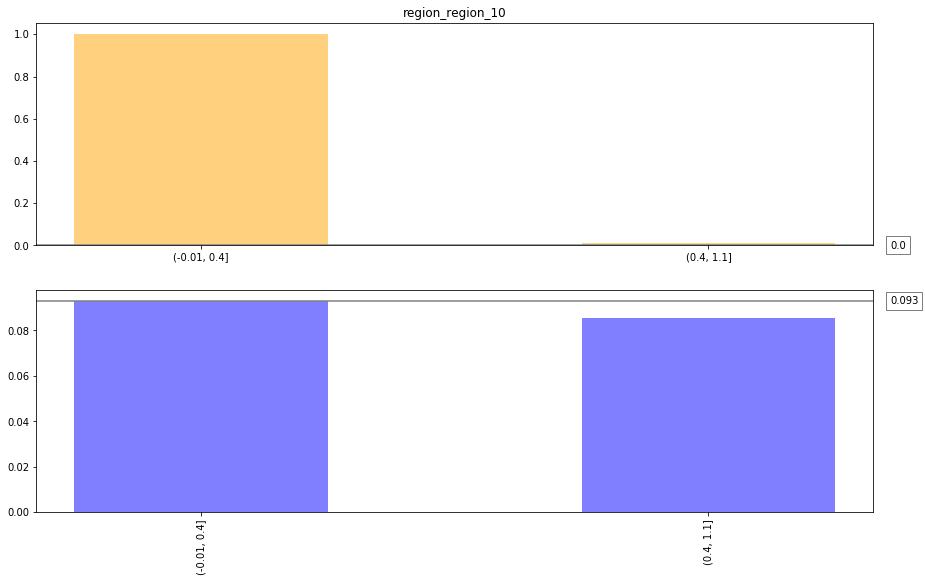

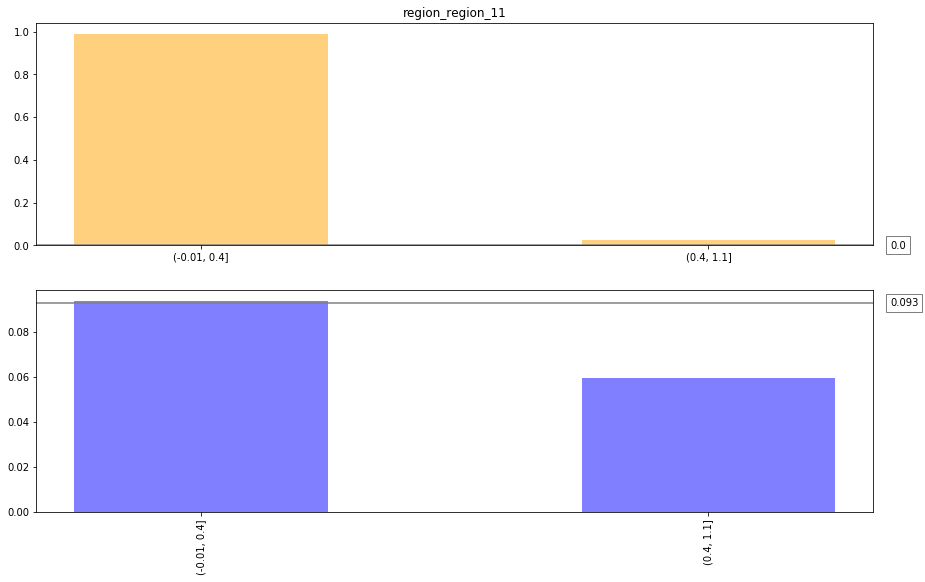

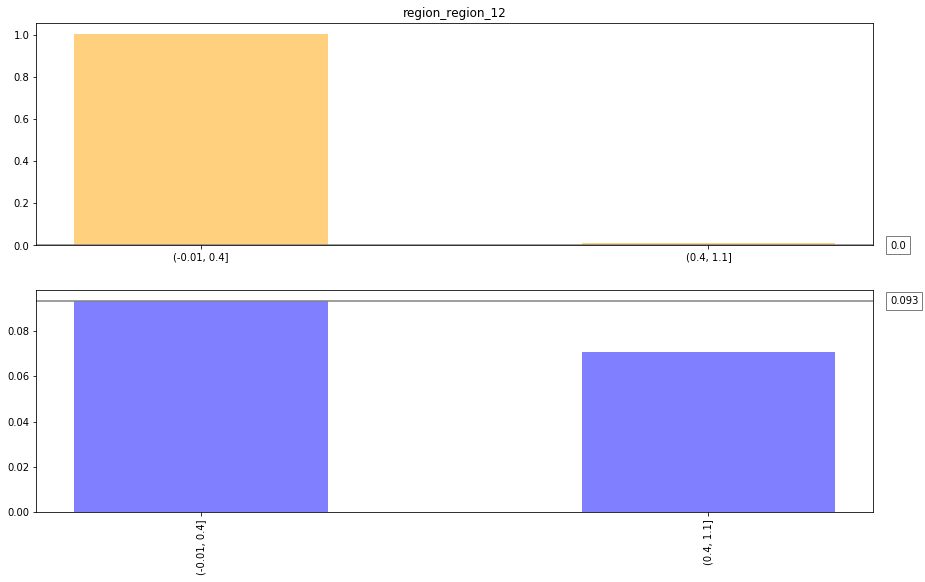

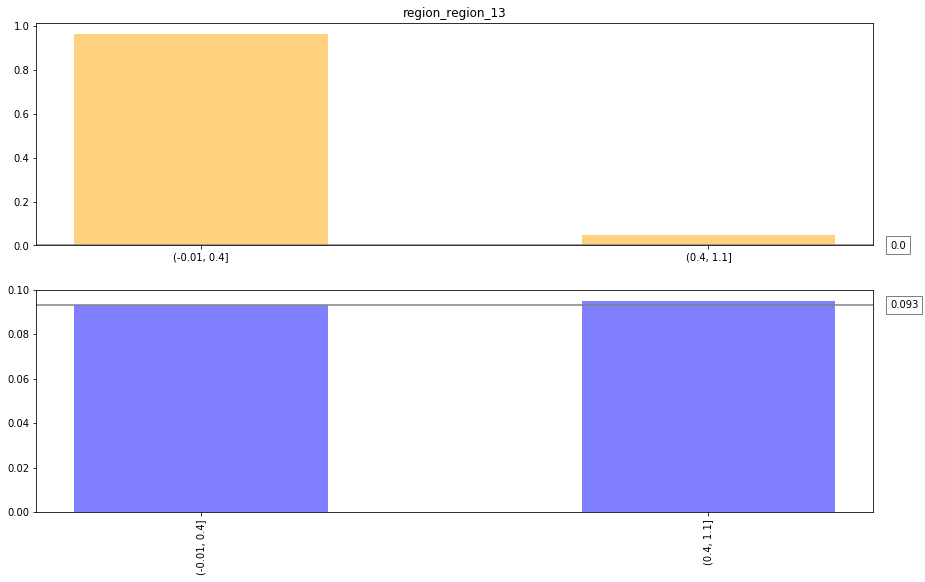

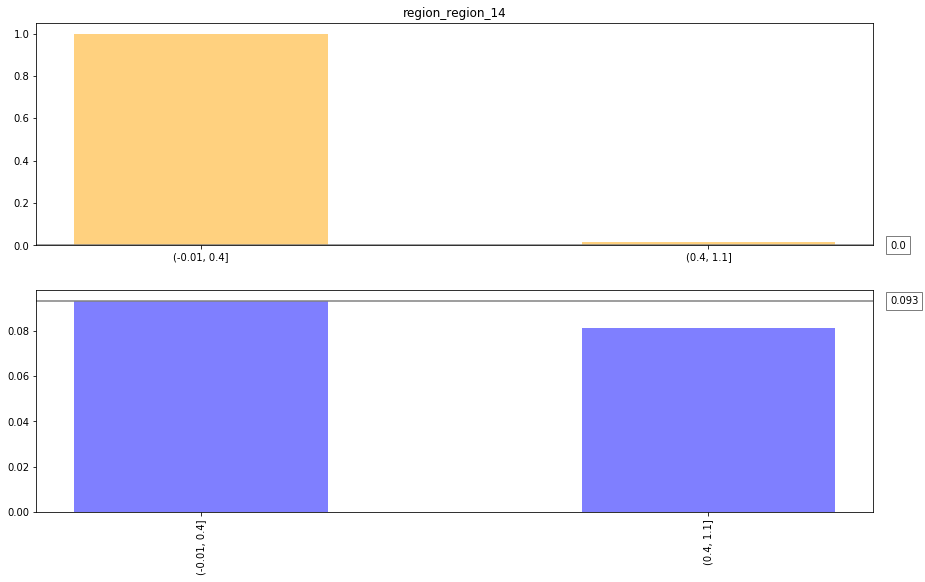

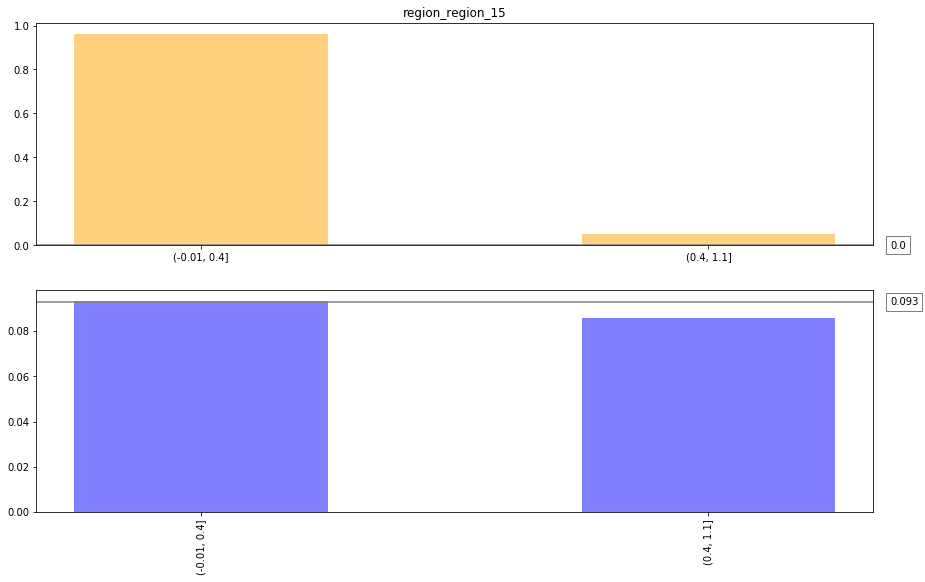

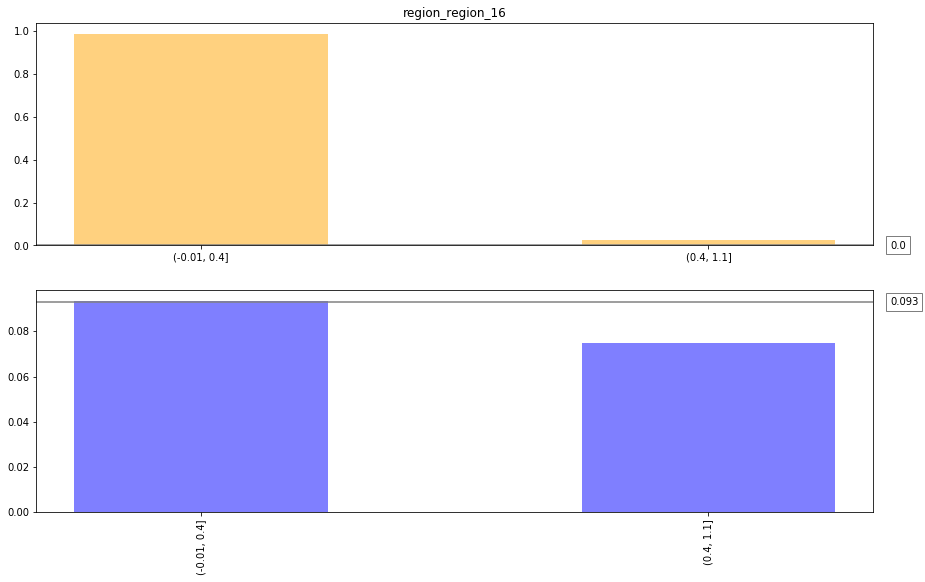

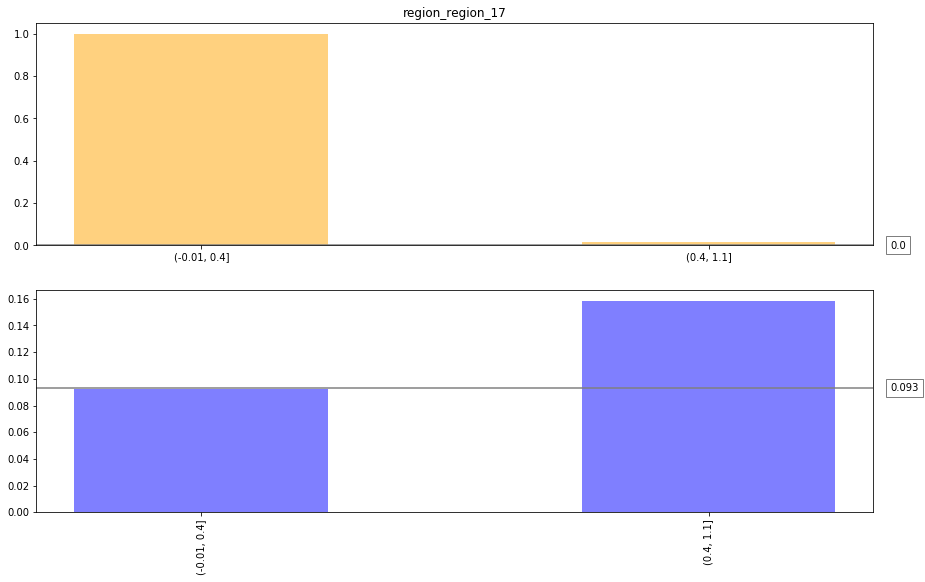

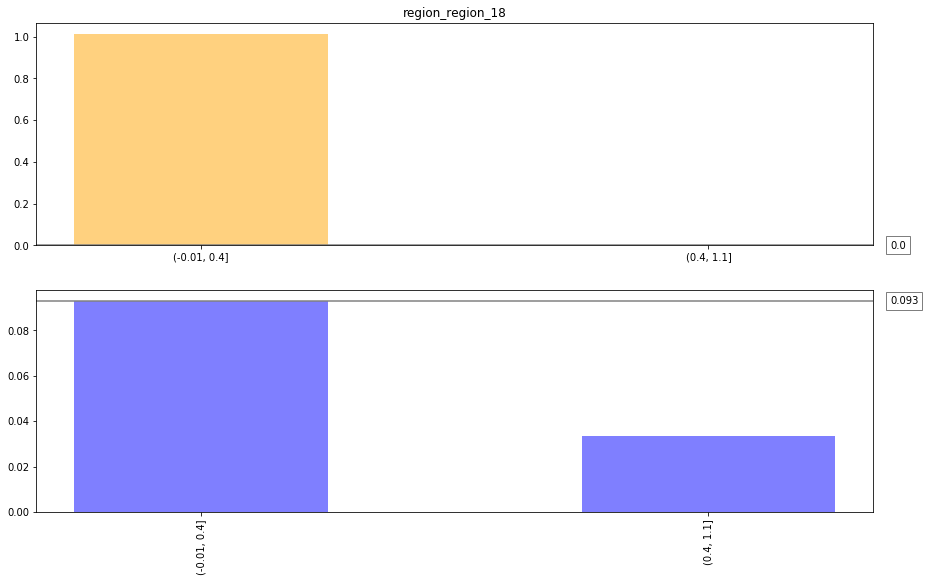

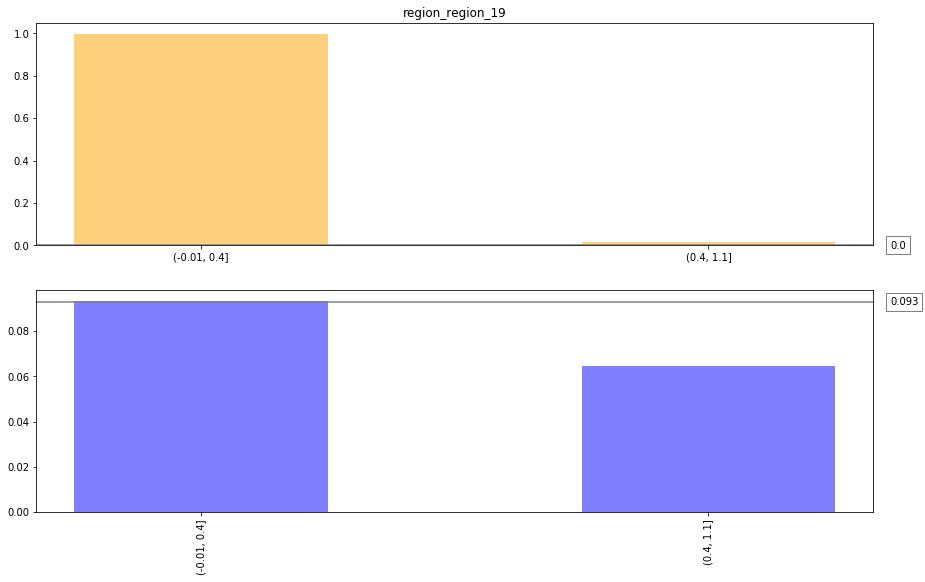

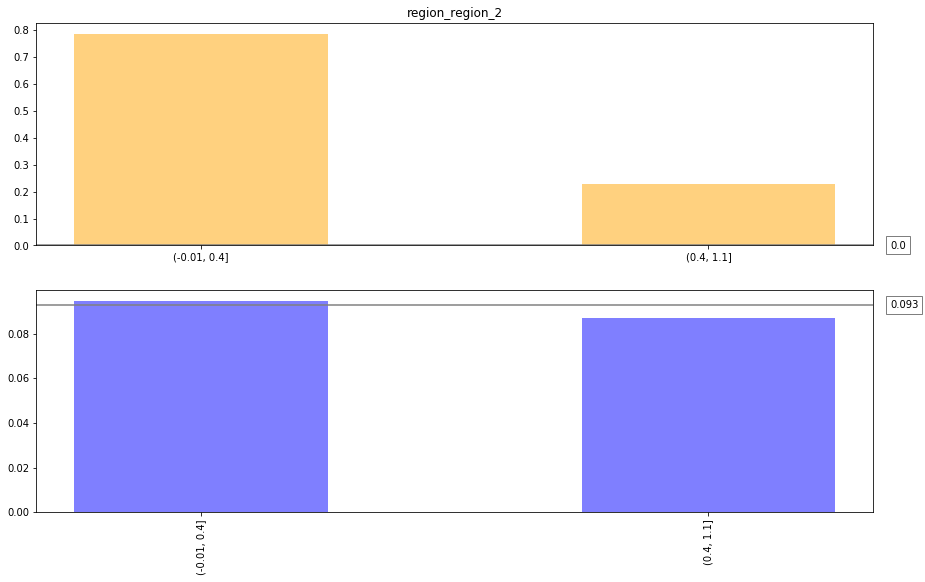

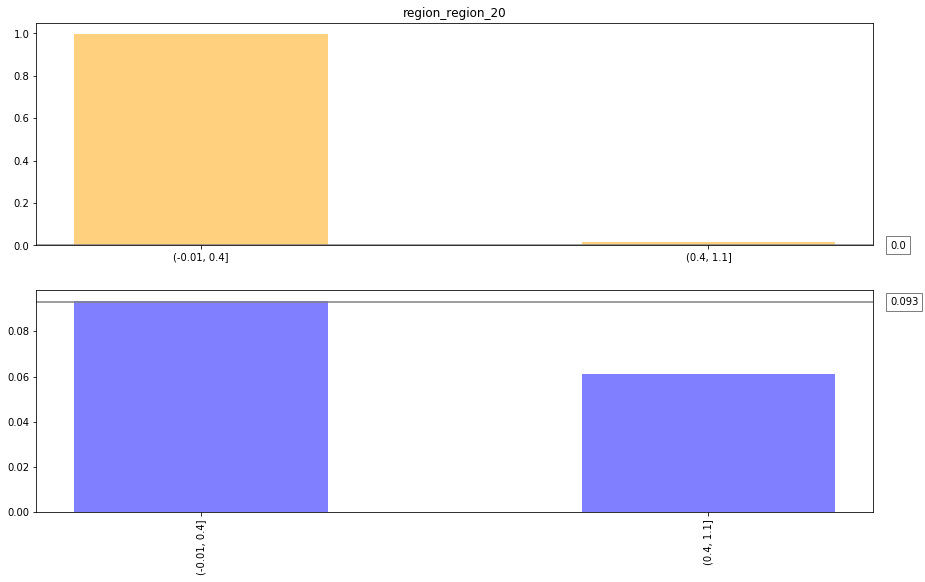

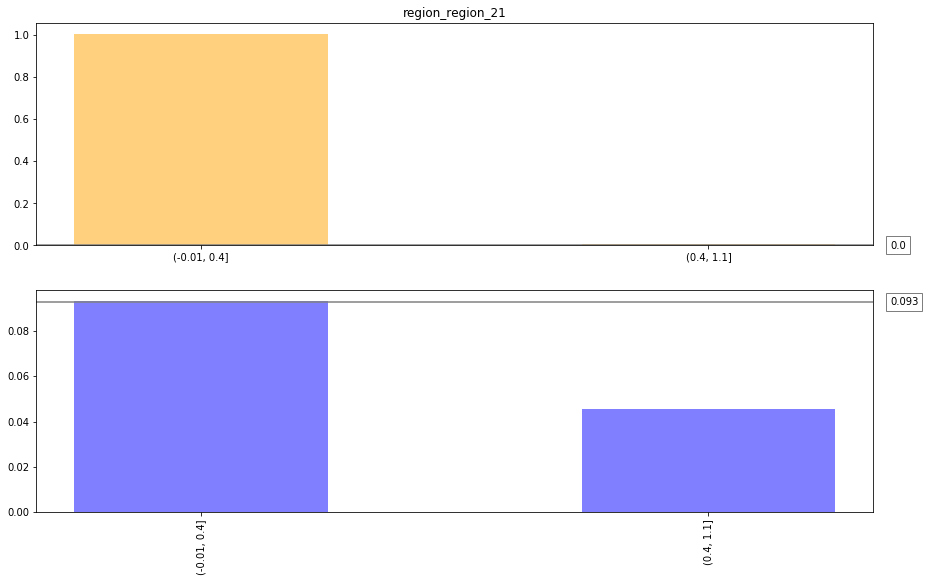

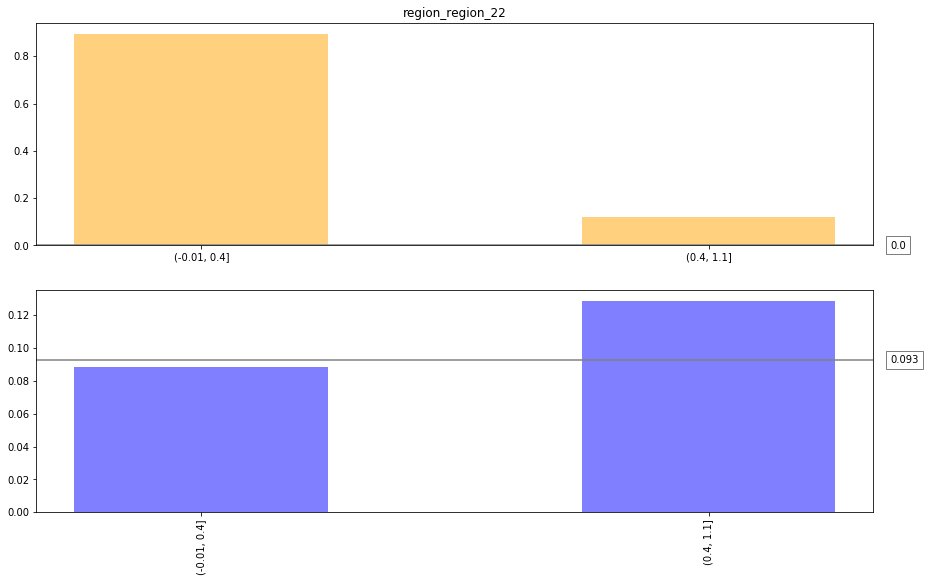

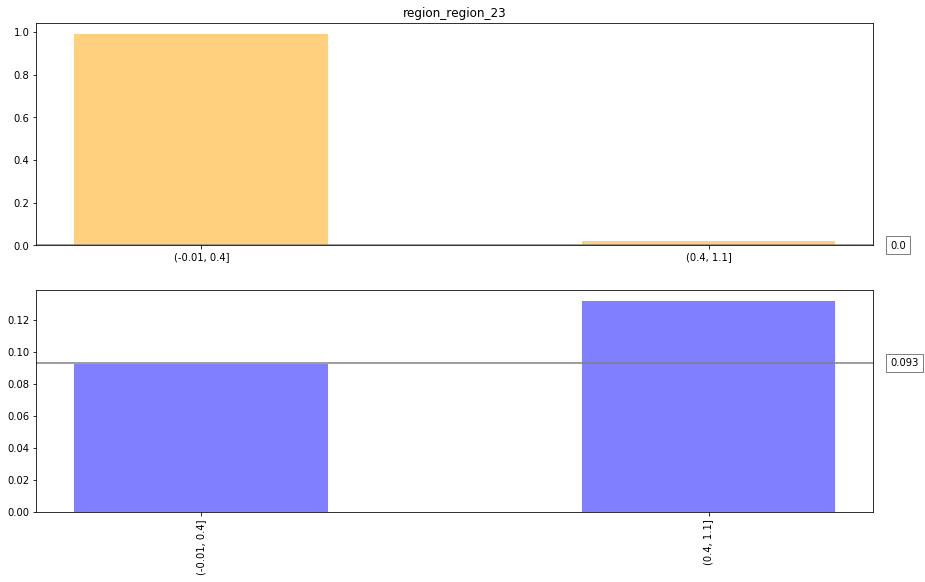

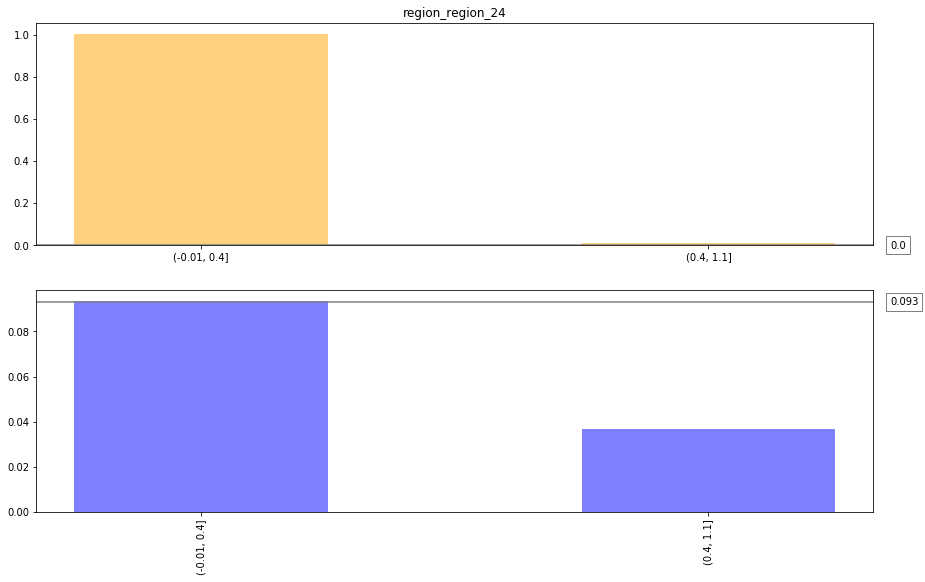

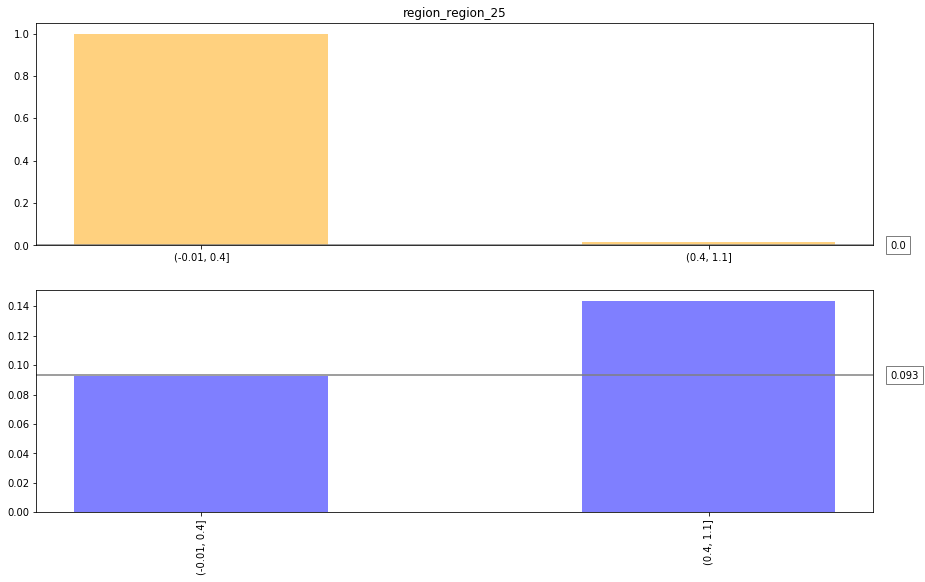

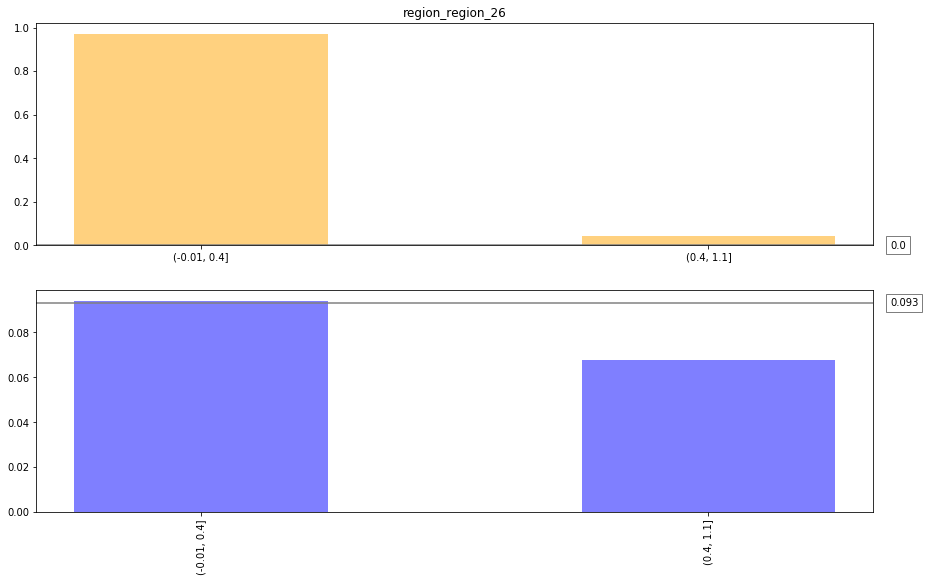

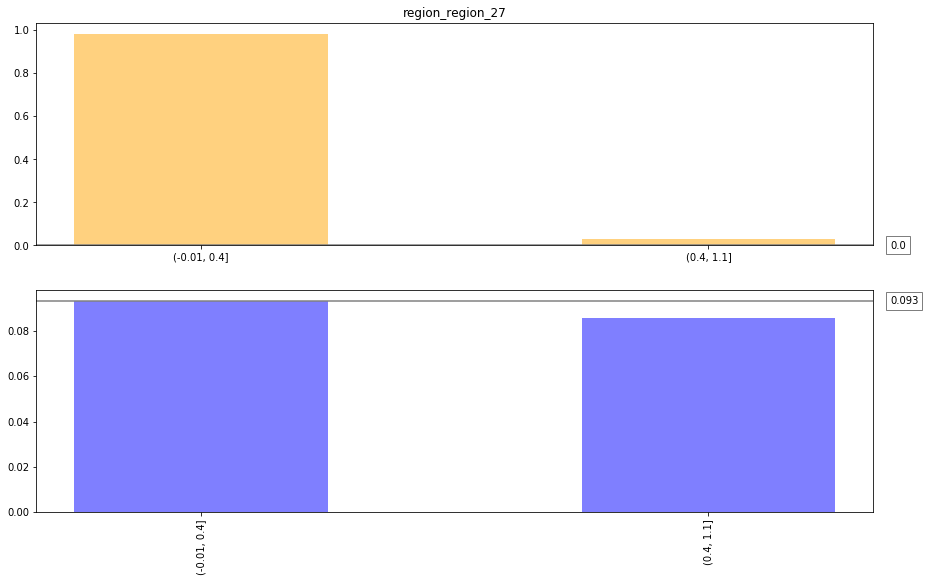

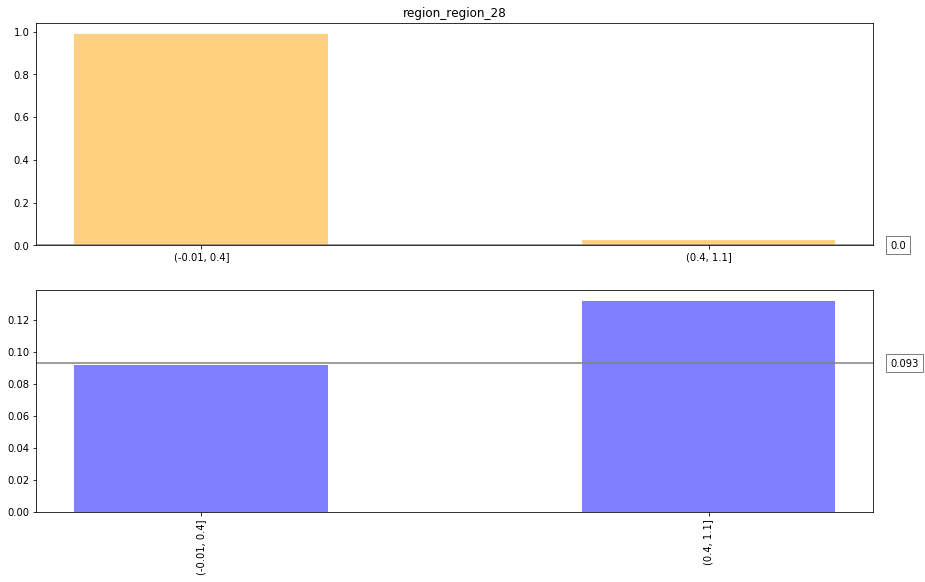

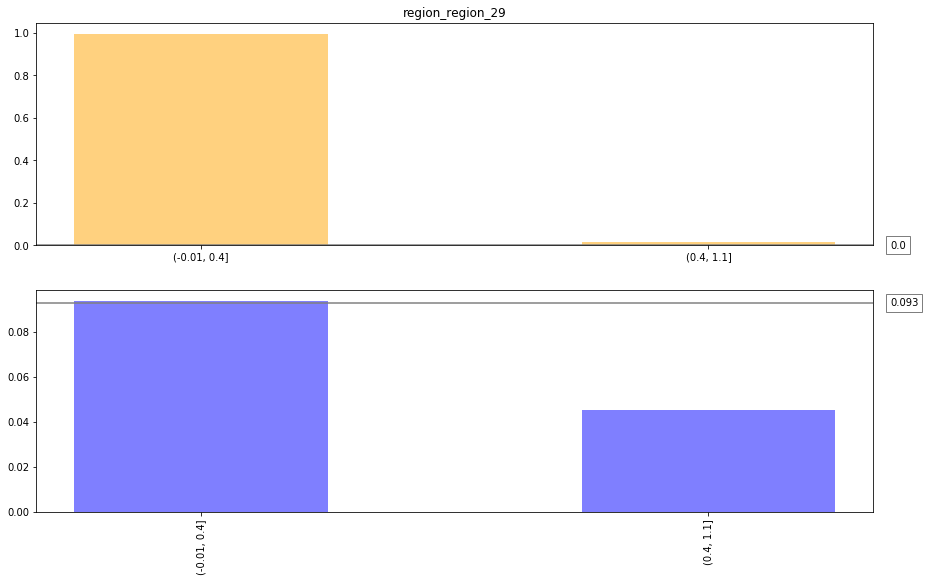

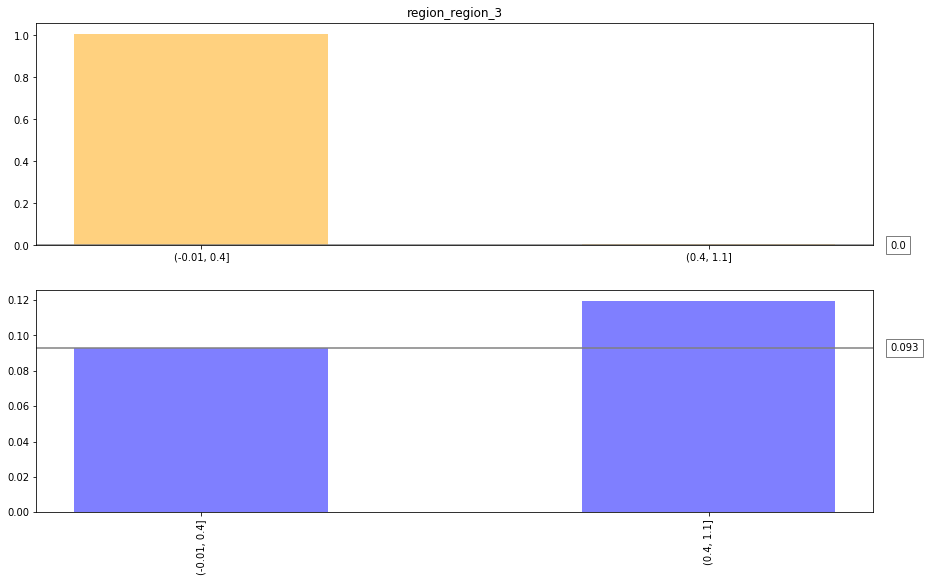

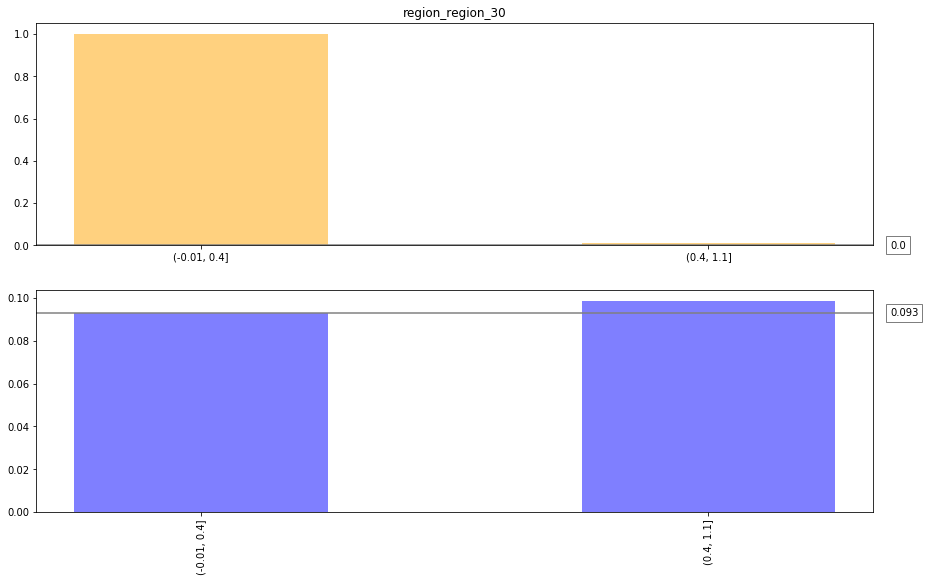

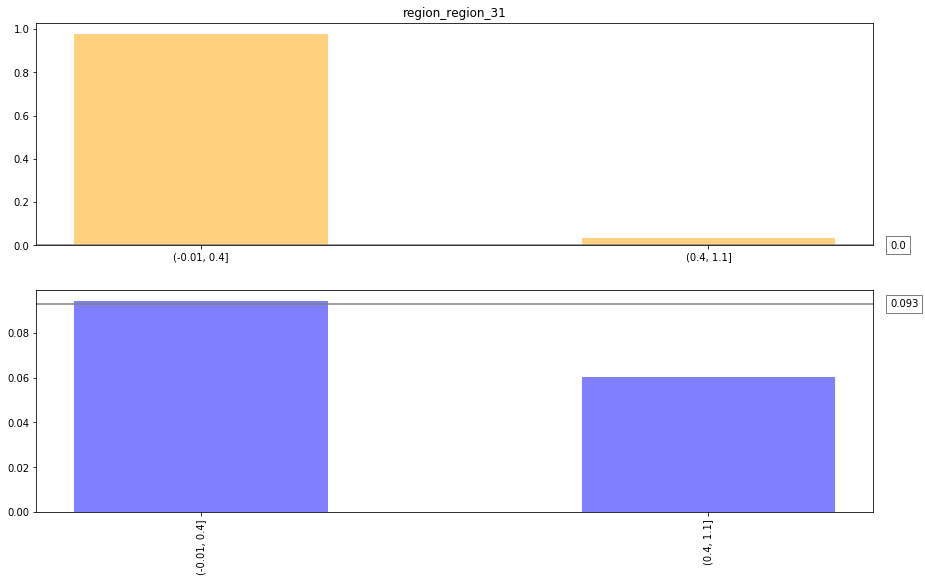

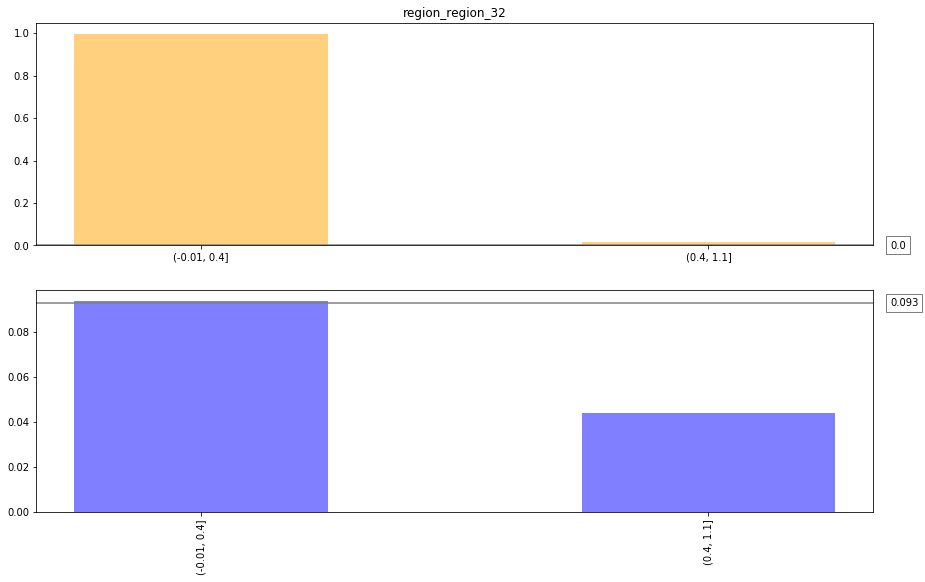

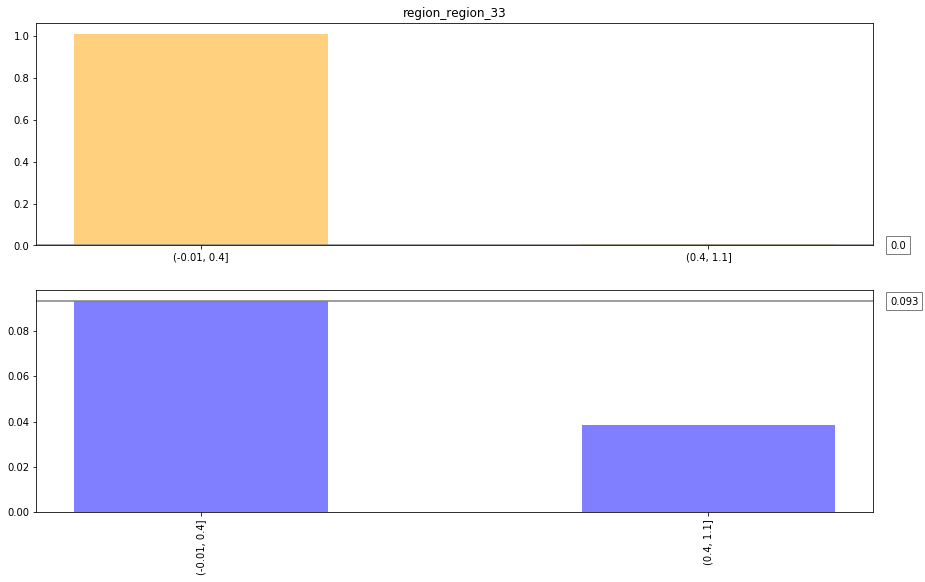

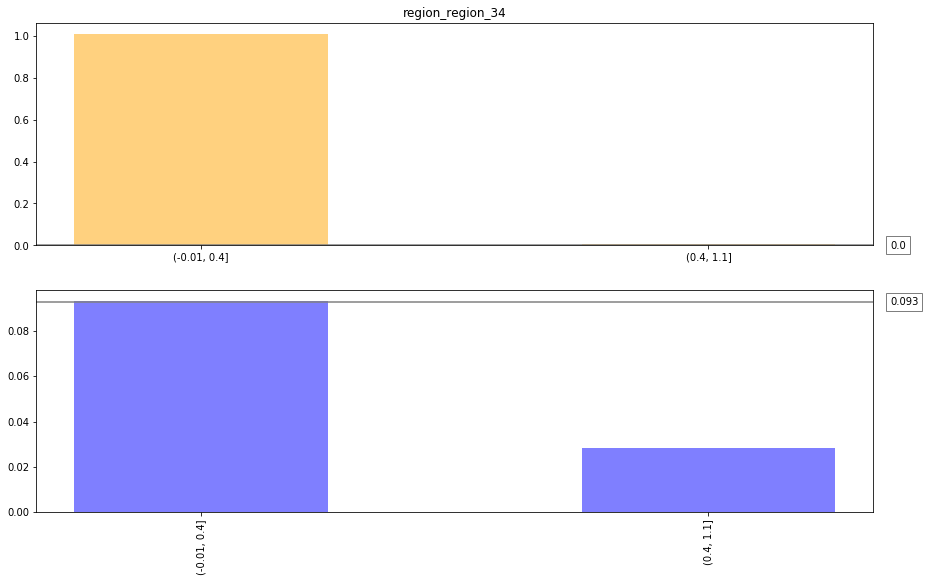

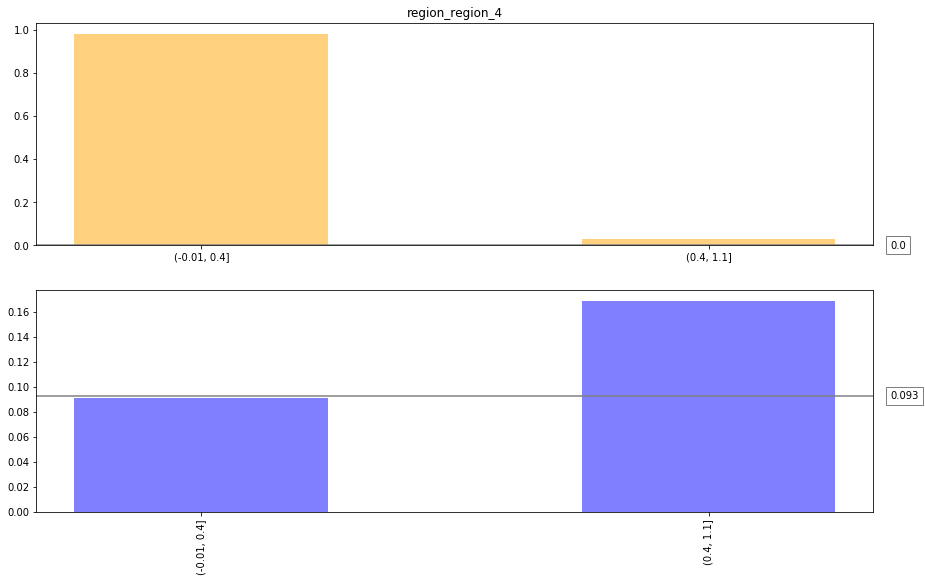

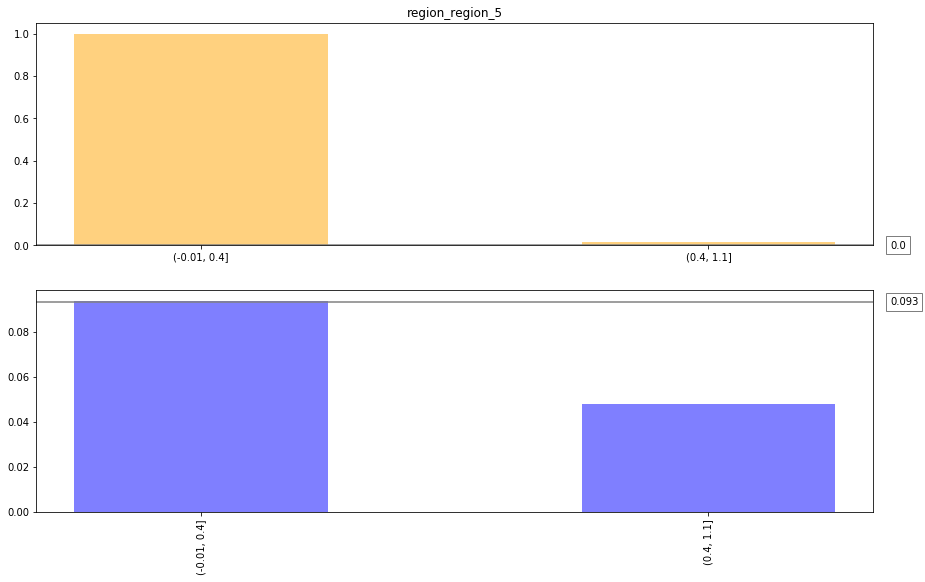

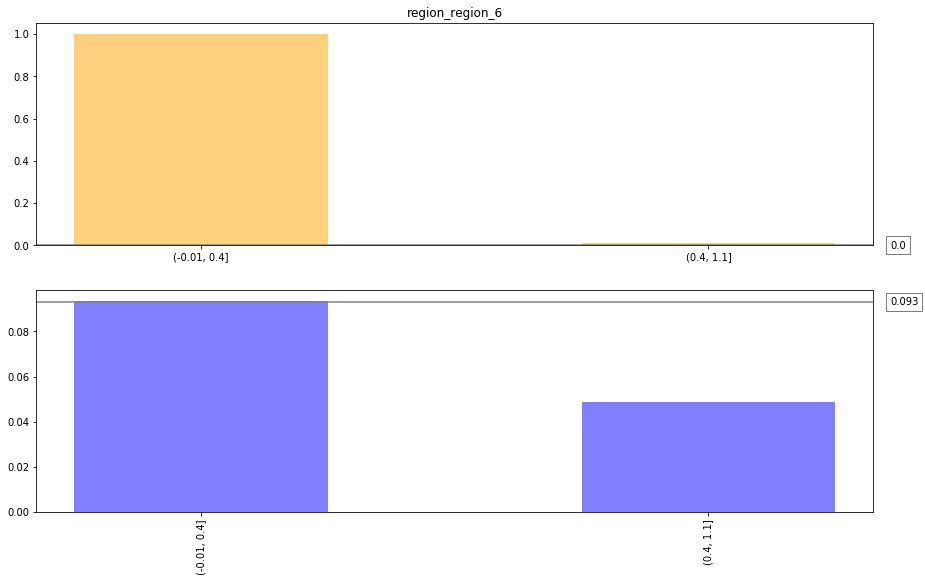

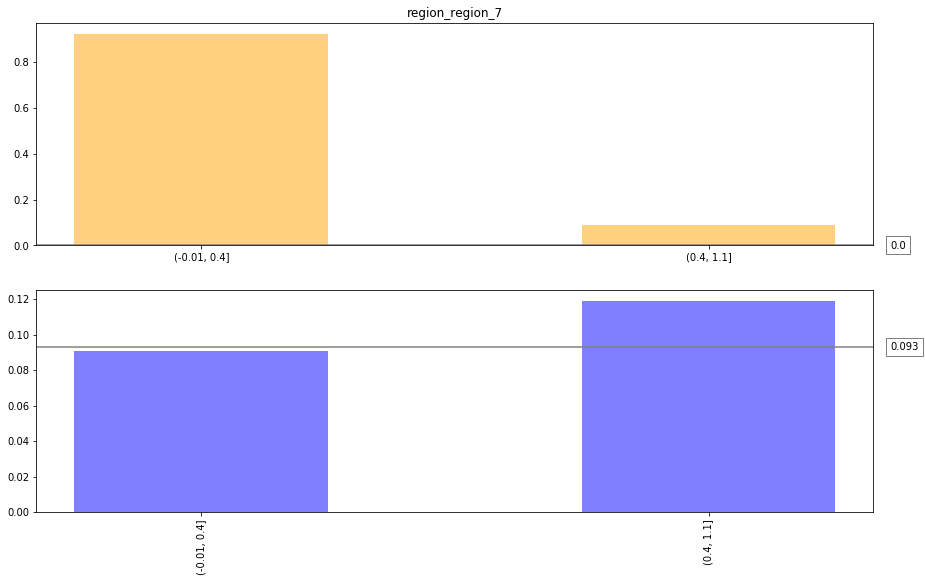

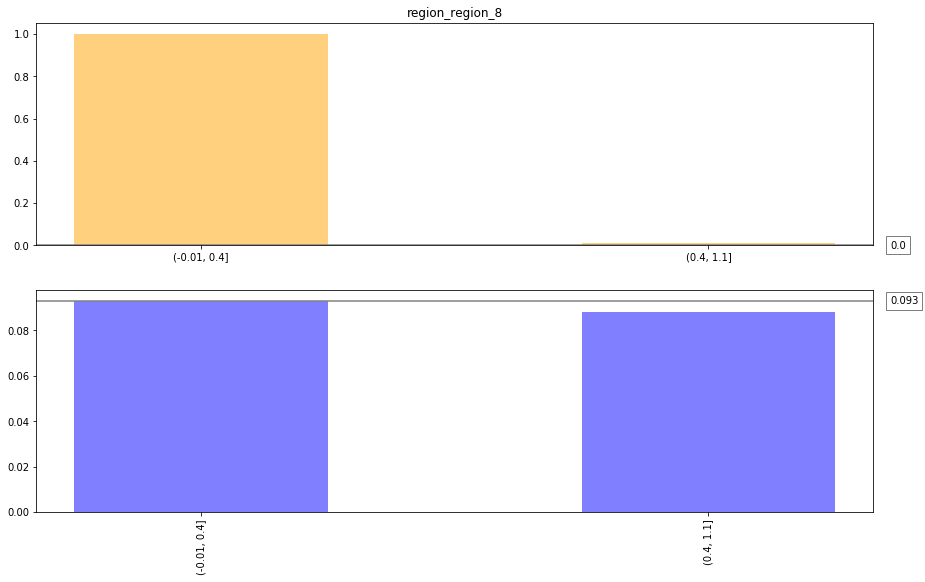

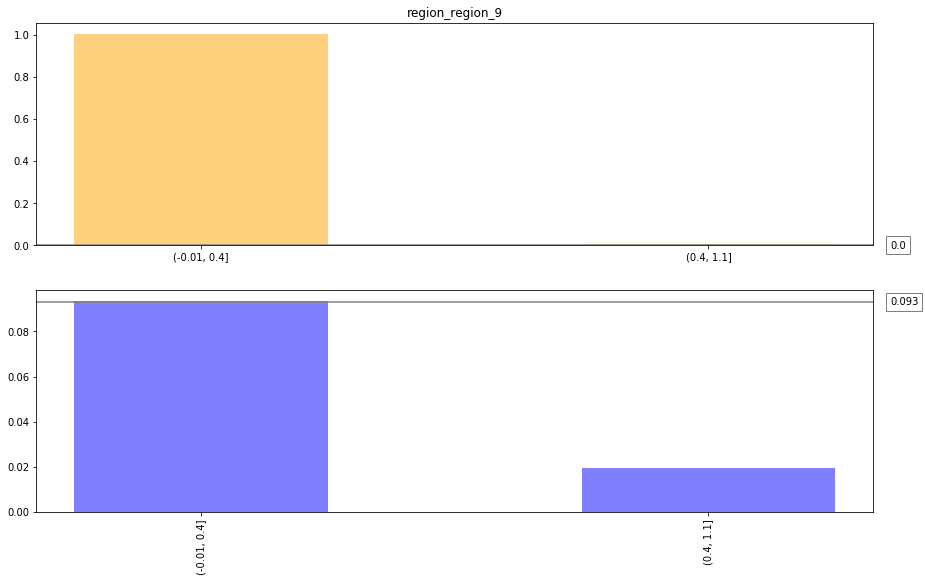

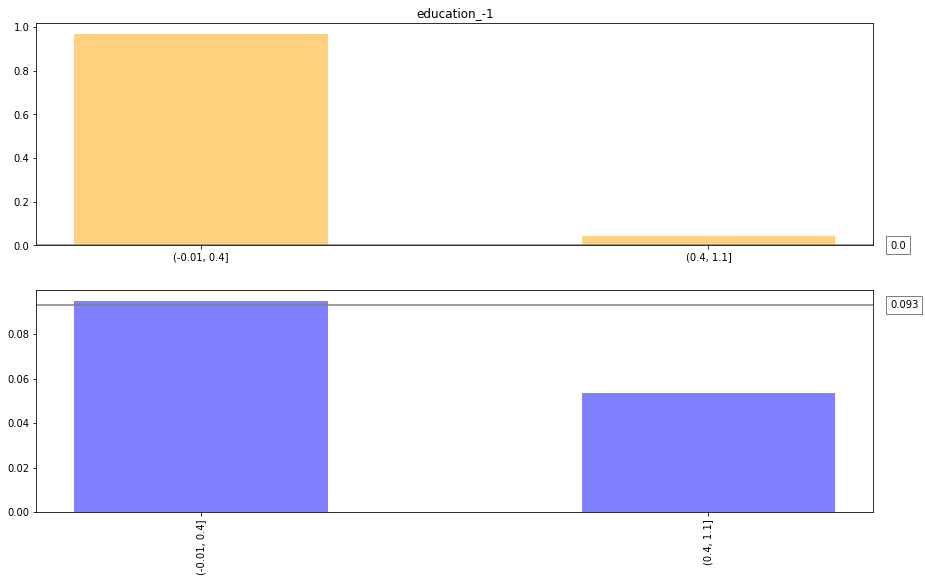

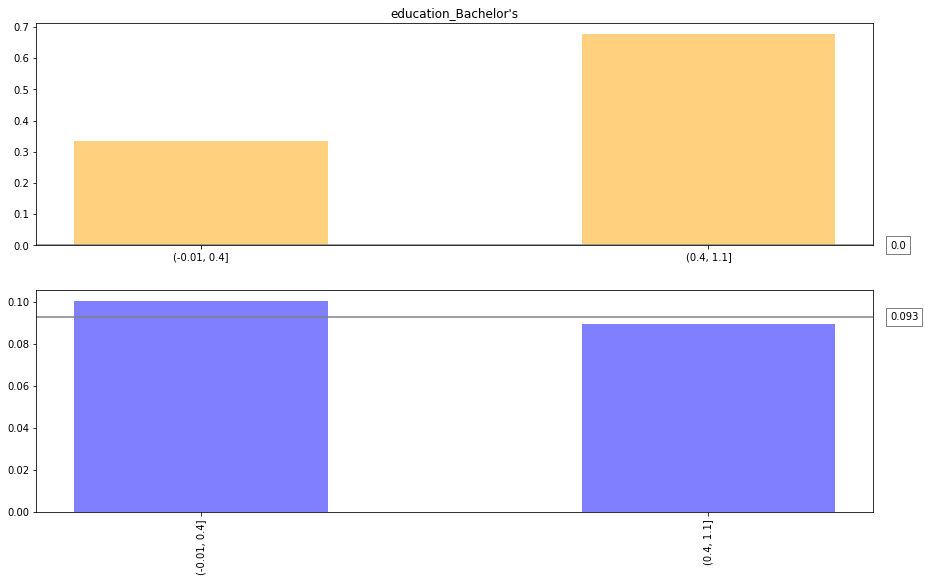

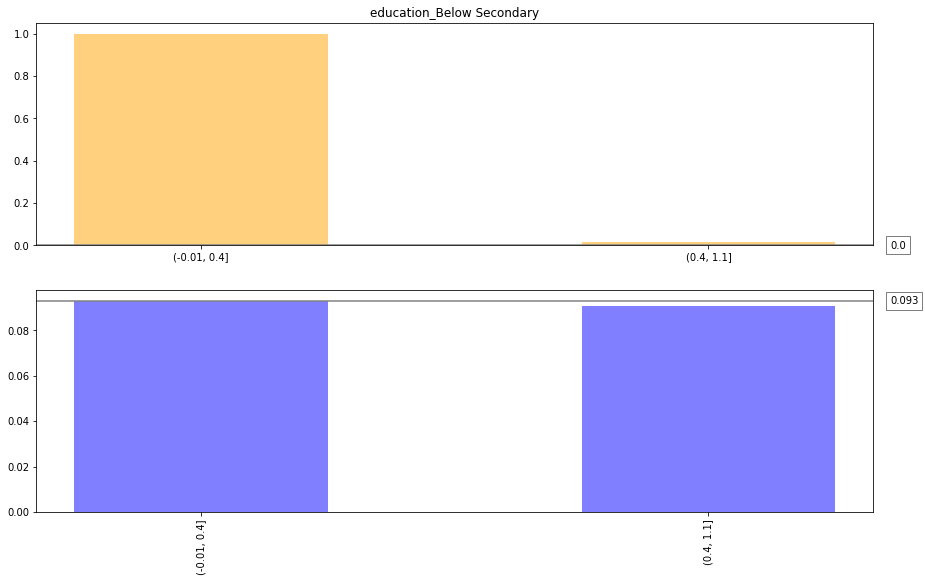

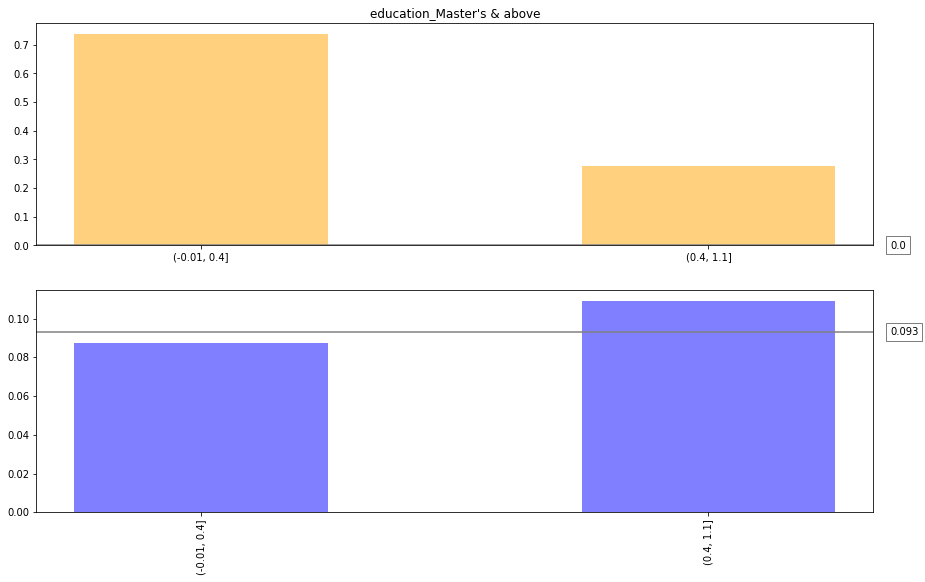

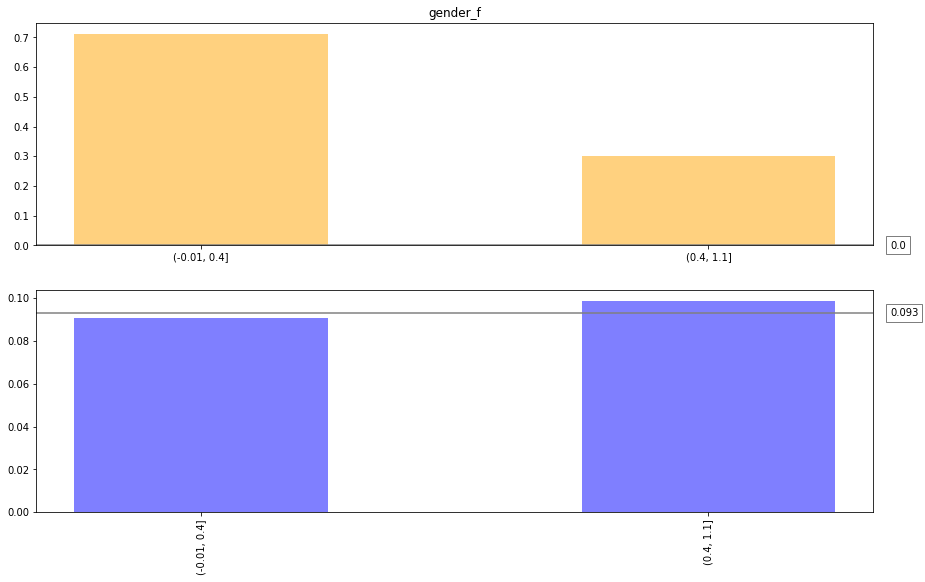

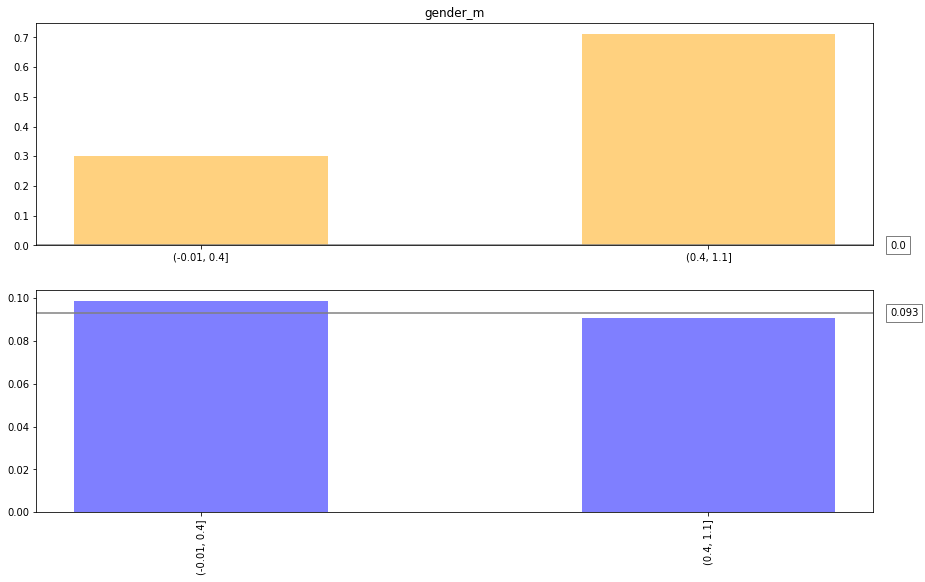

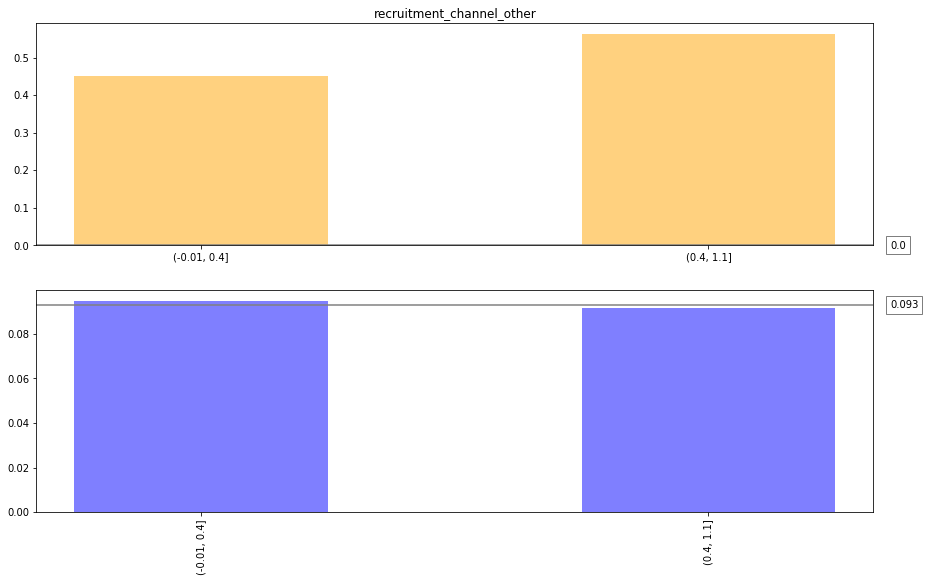

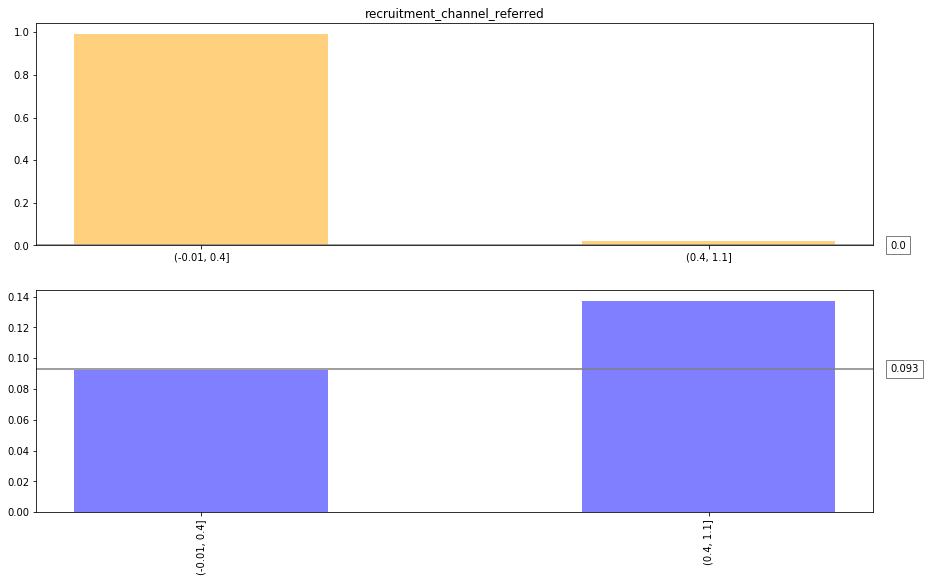

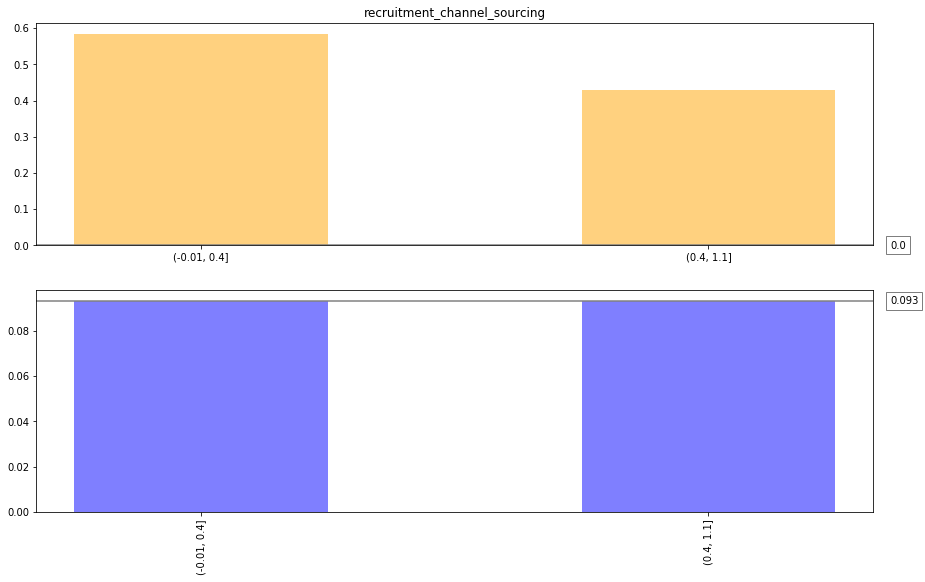

In [89]:
#100 bins
i=10
for col in xtrainfull.columns:

    i-=1
    #if i==0:
    #    break
    #plt.style.use('seaborn-white')
    f,ax=plt.subplots(2,1,figsize=(15,9))
    ax[0].set_title(col)
    g=plotsum(xtrainfull,col,'is_promoted',0,1,ax[0])
    g=plotratio(xtrainfull,col,'is_promoted',0,1,ax[1])

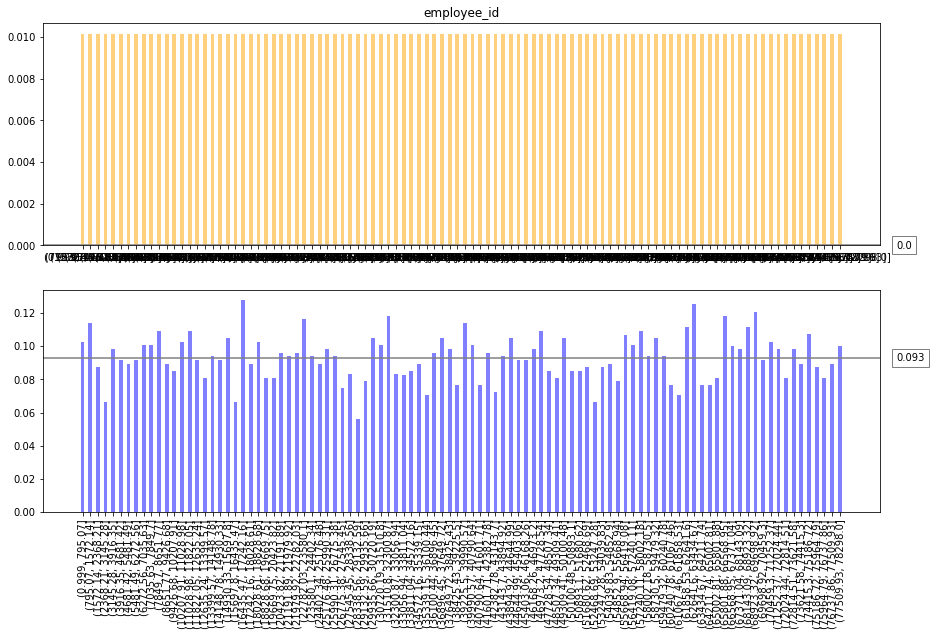

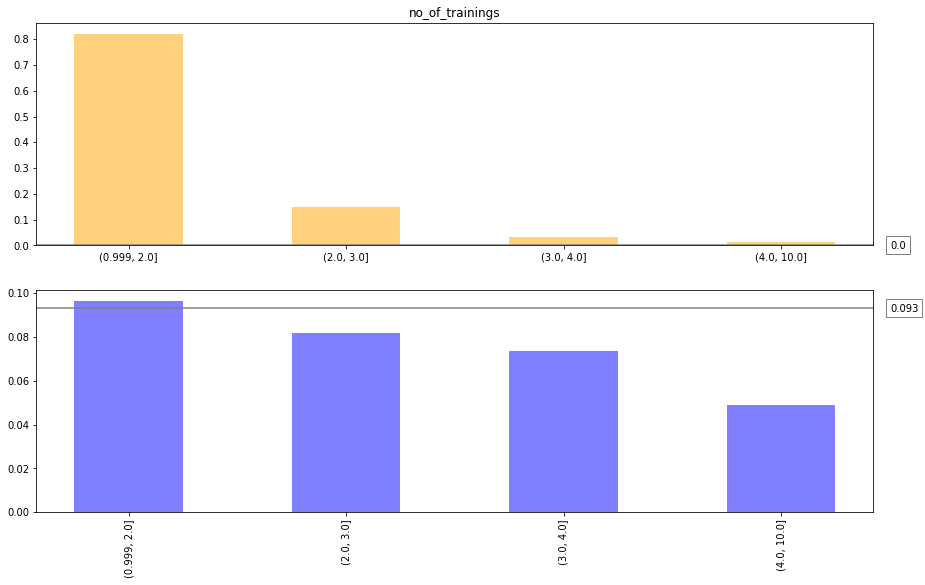

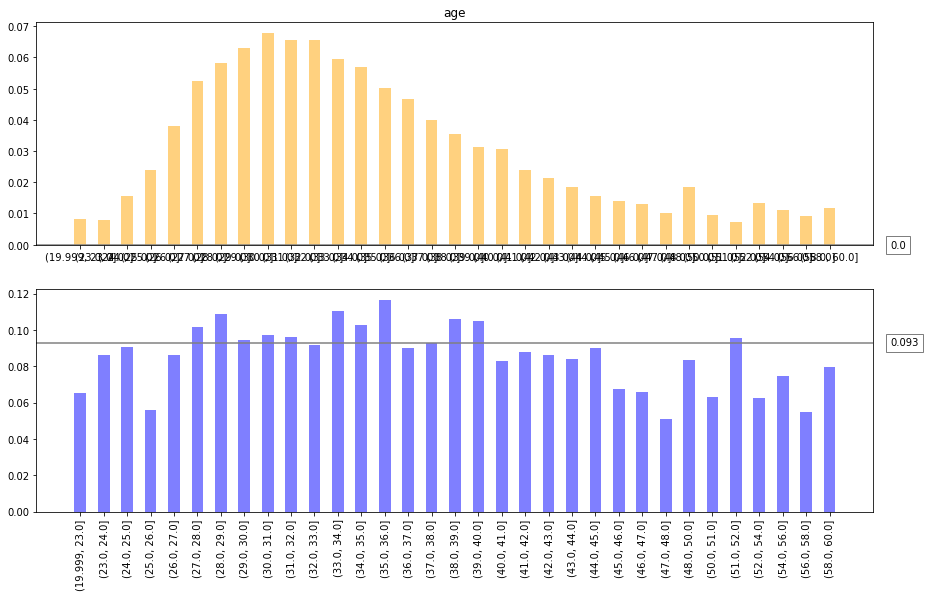

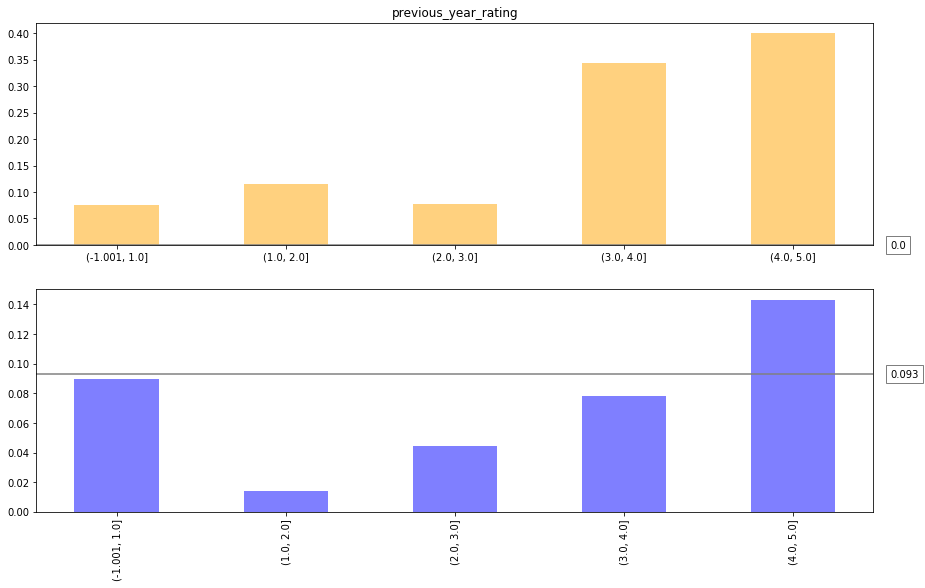

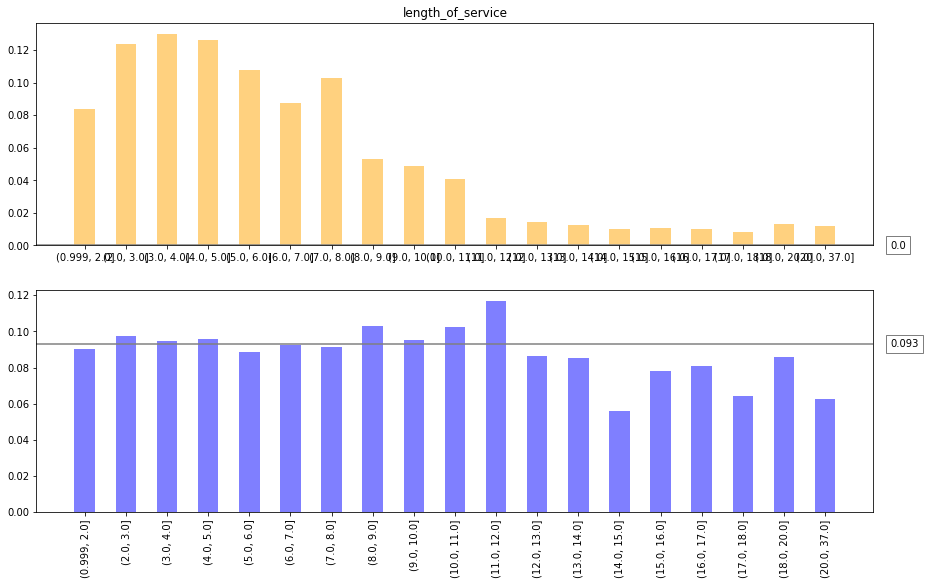

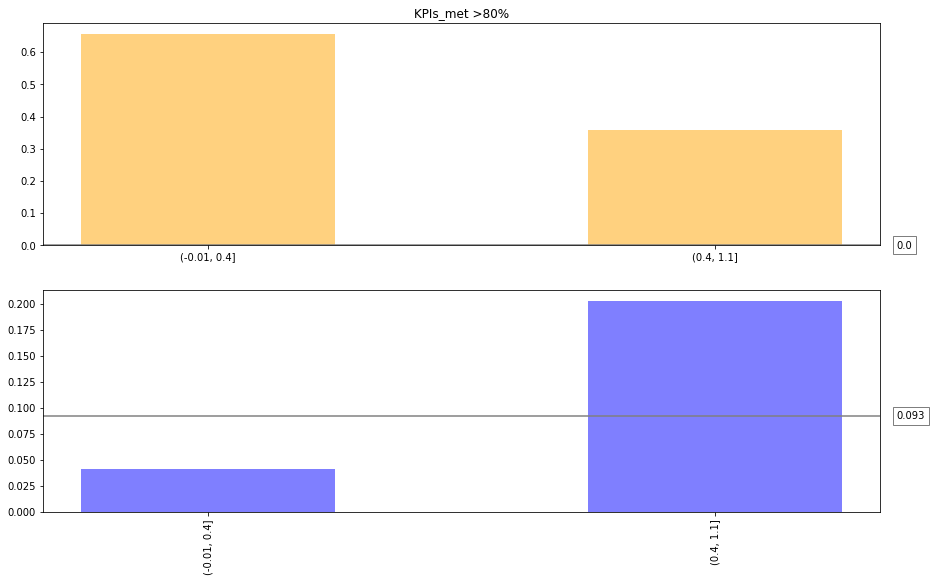

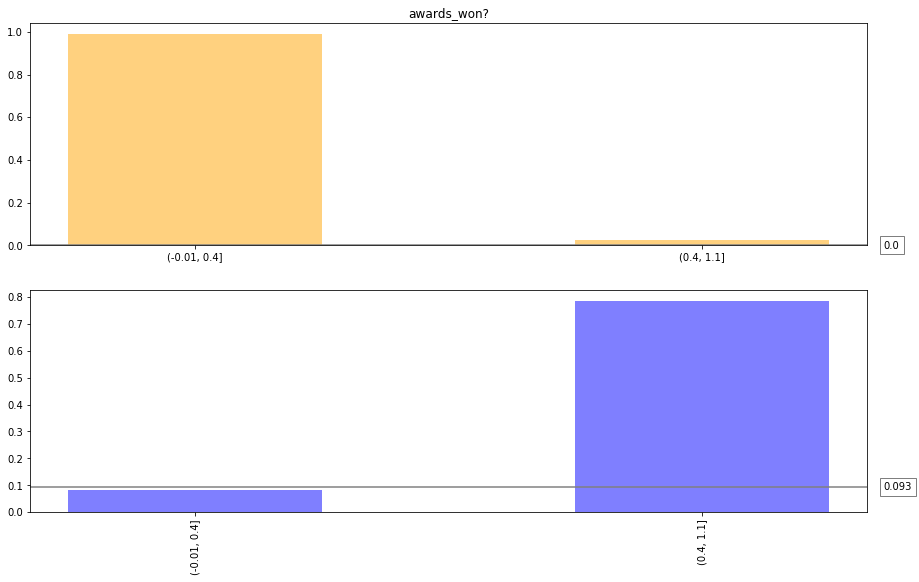

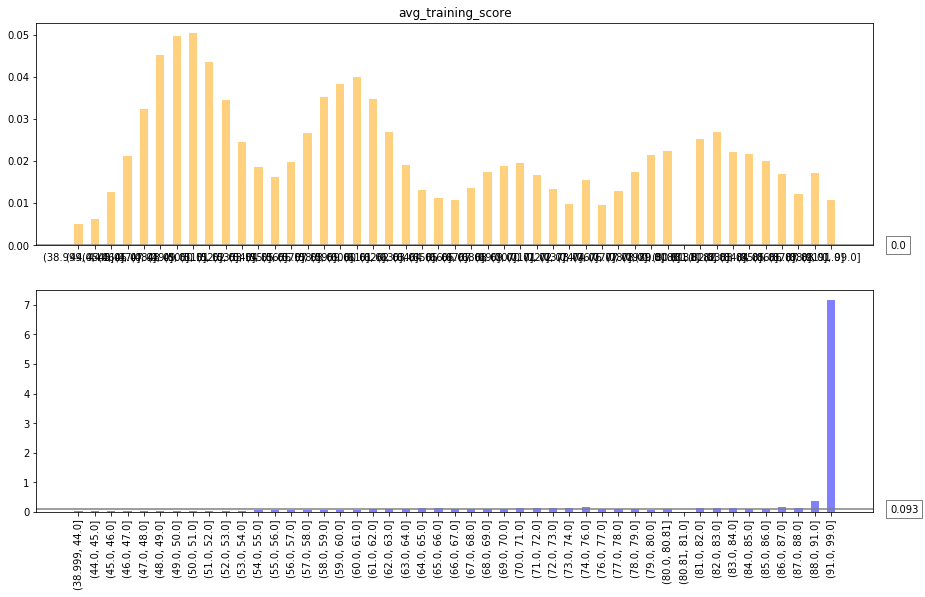

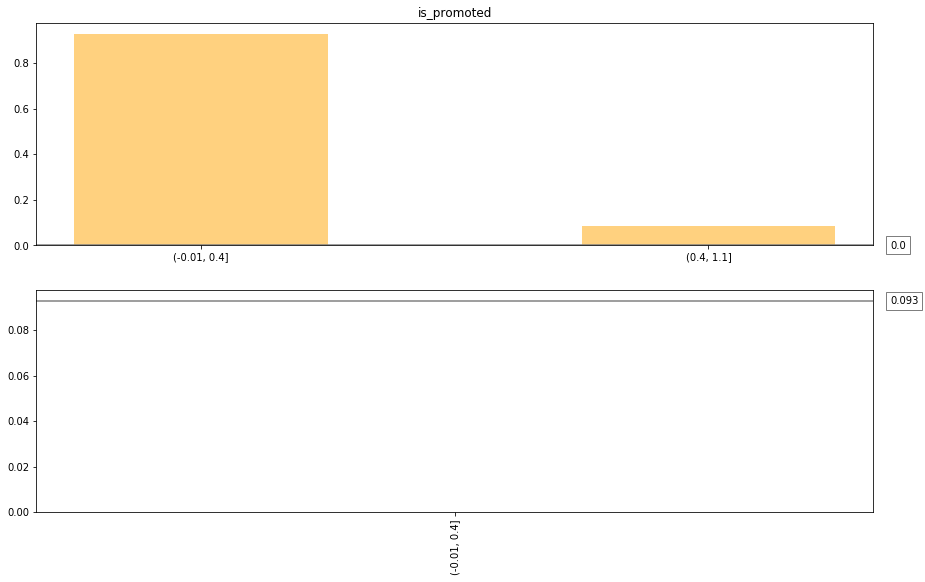

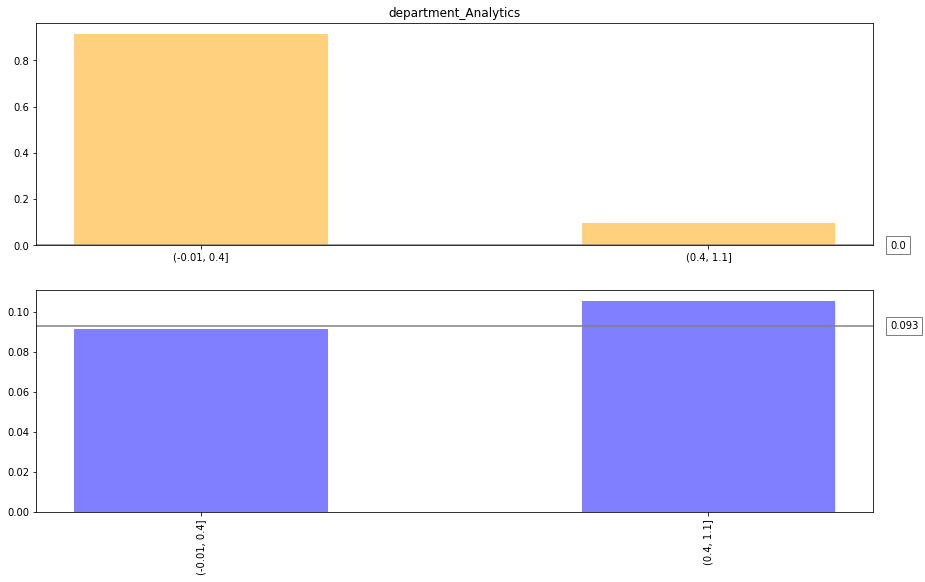

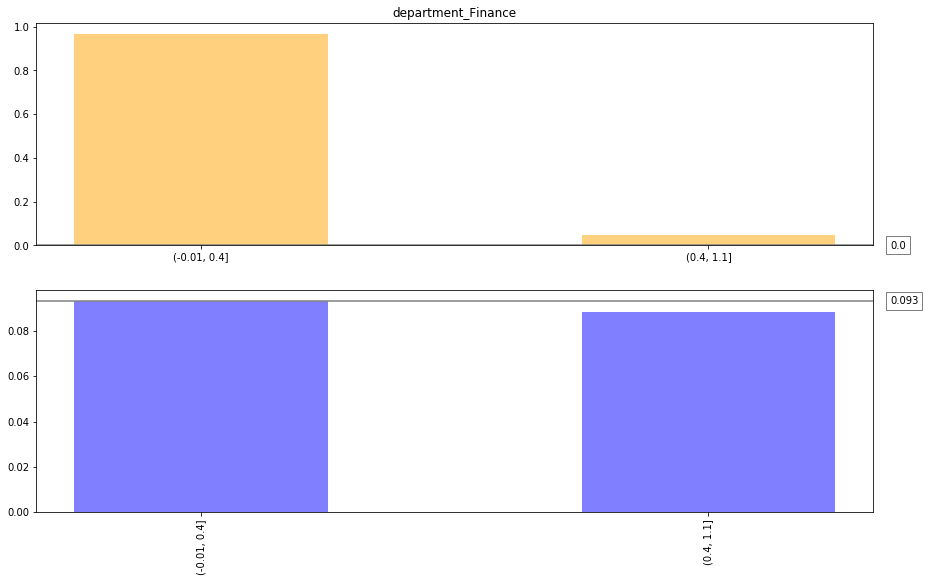

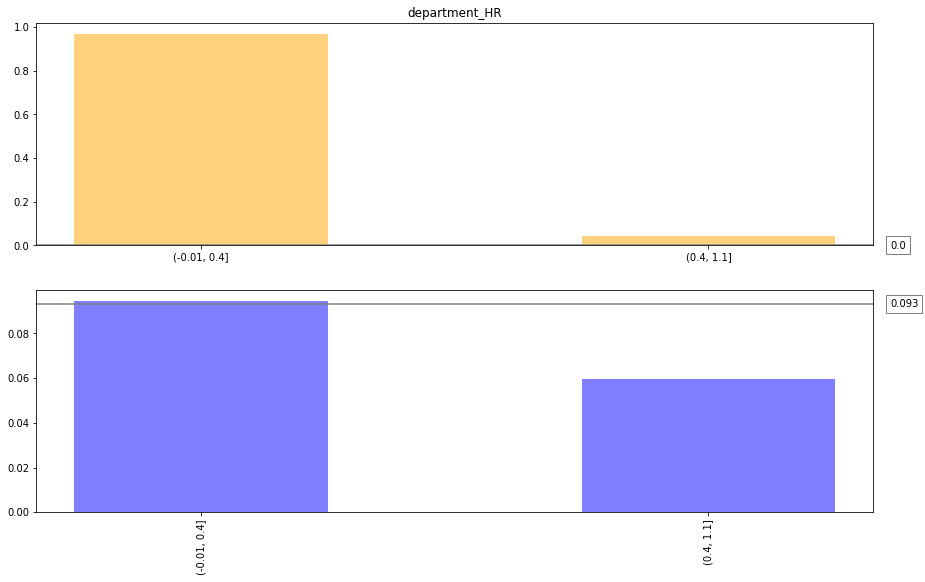

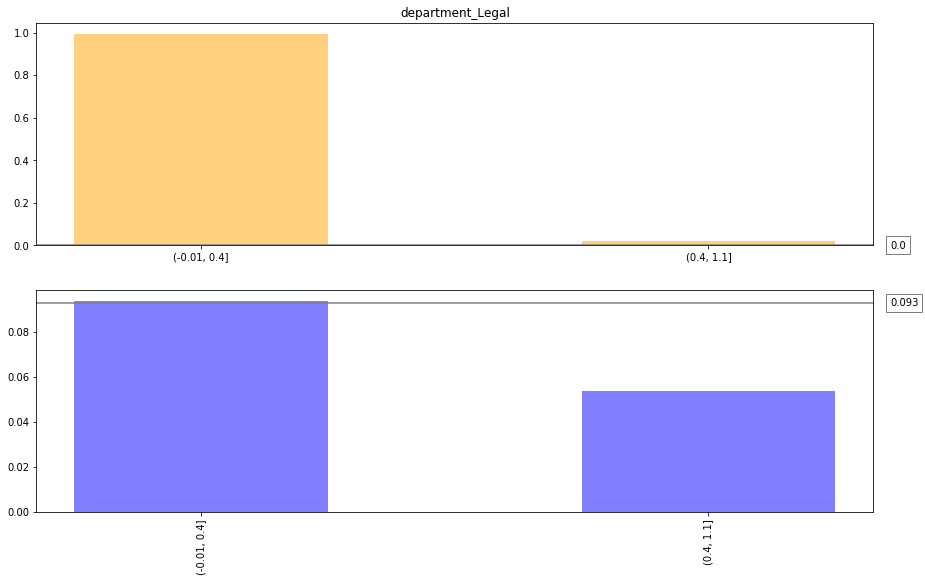

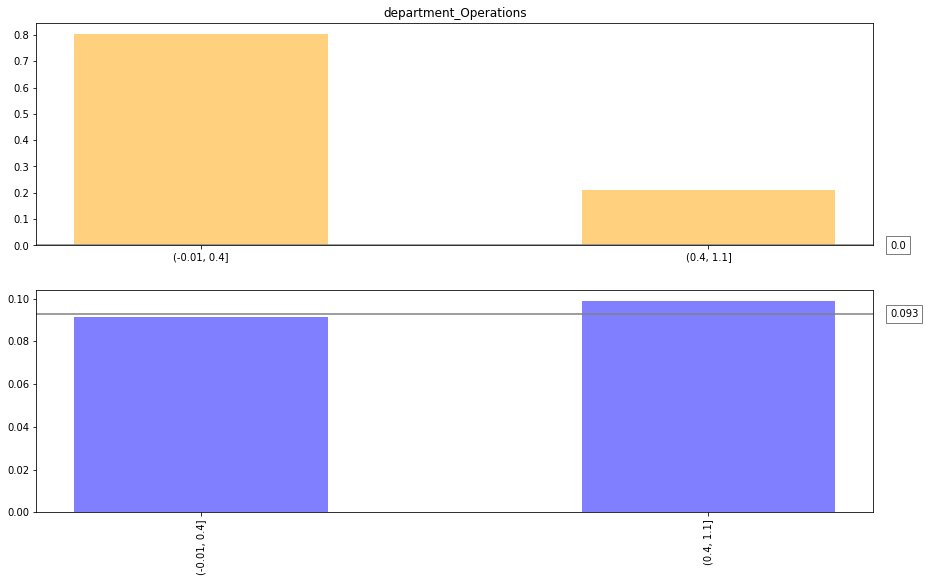

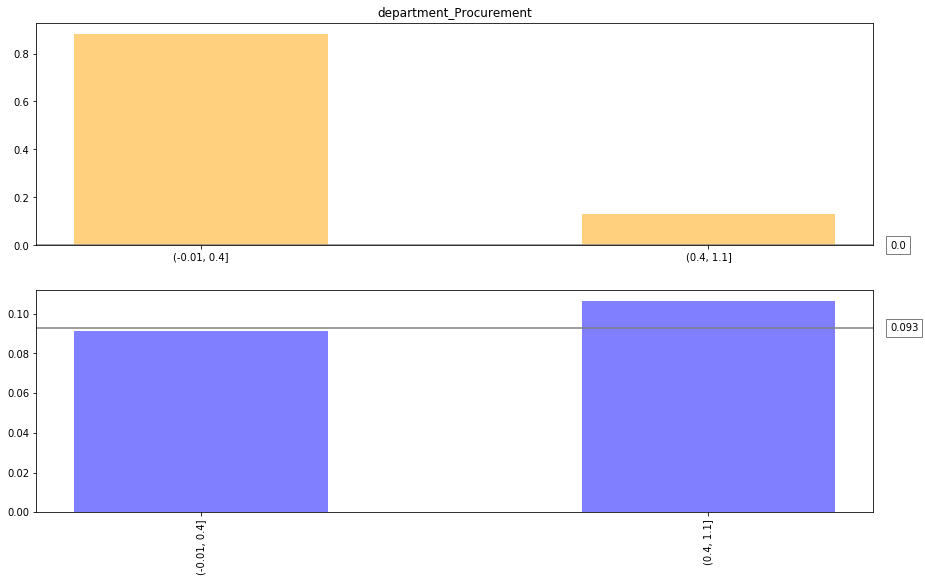

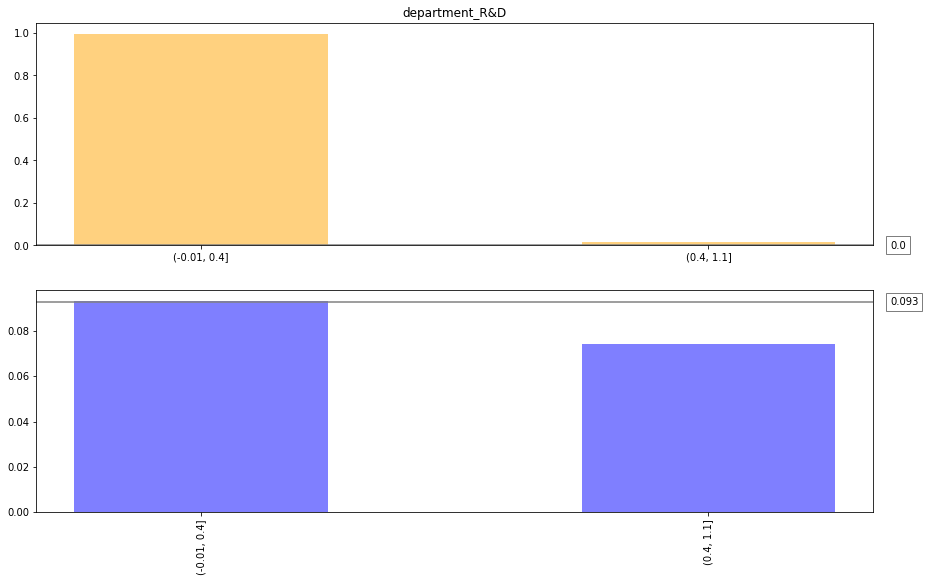

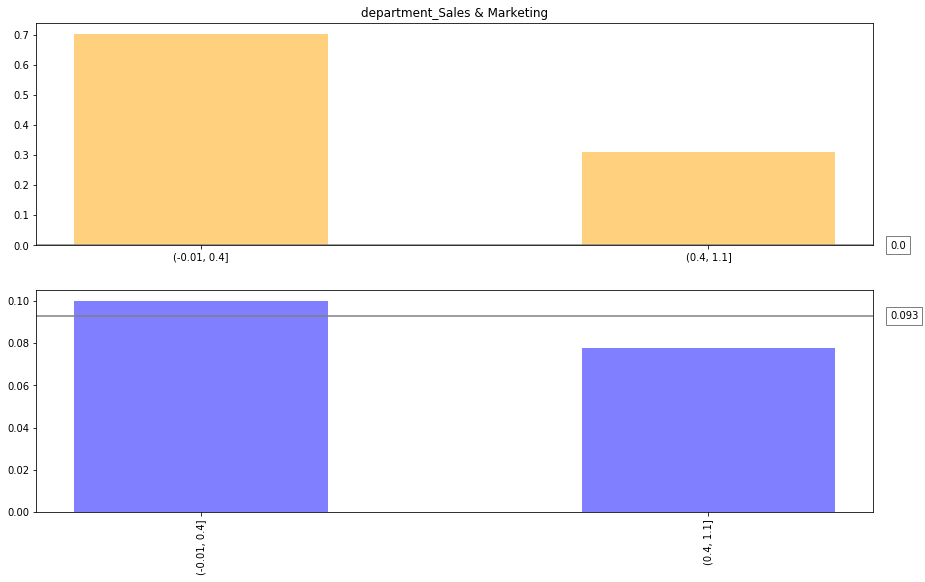

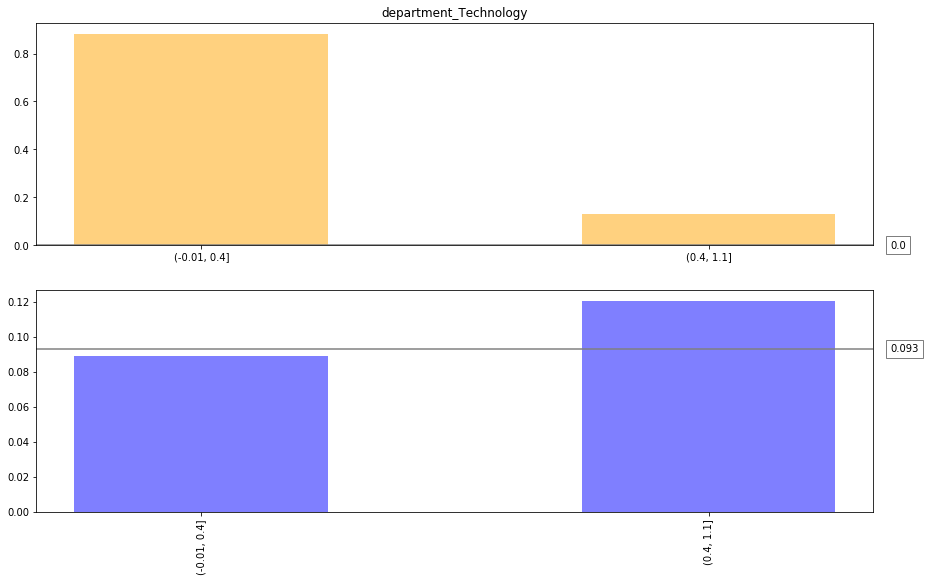

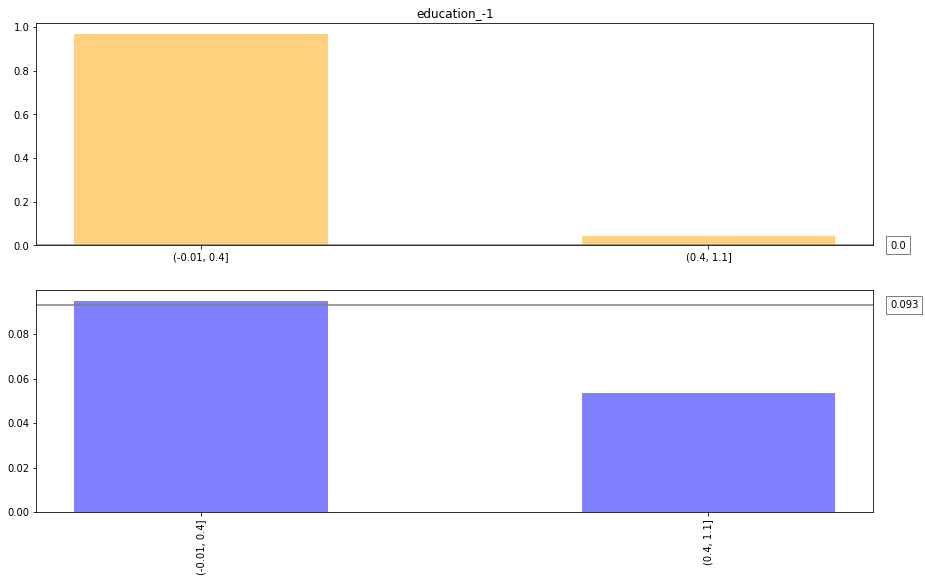

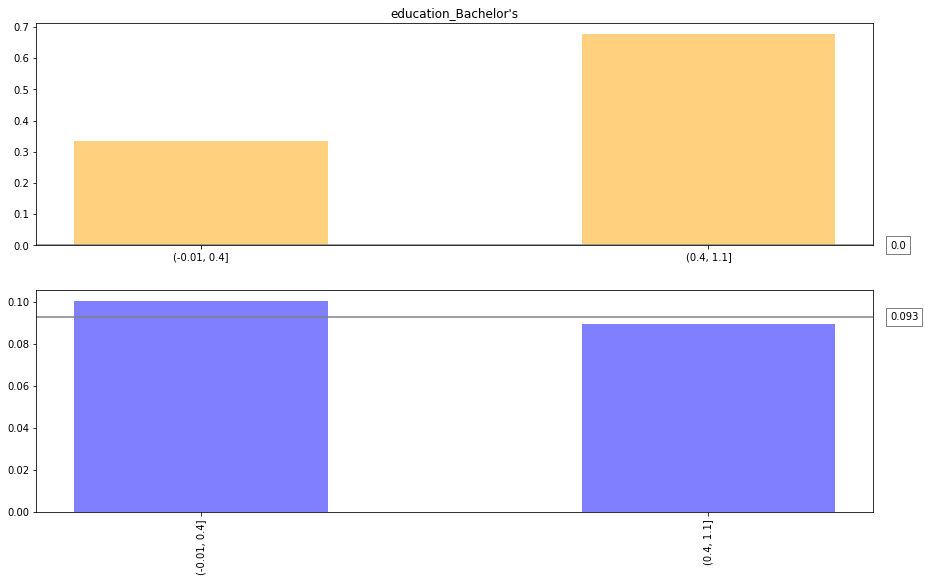

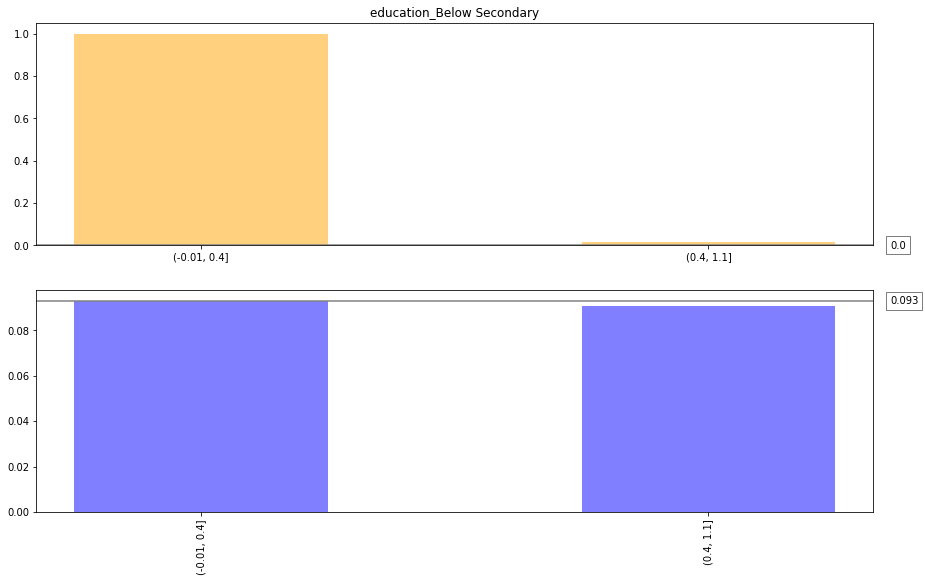

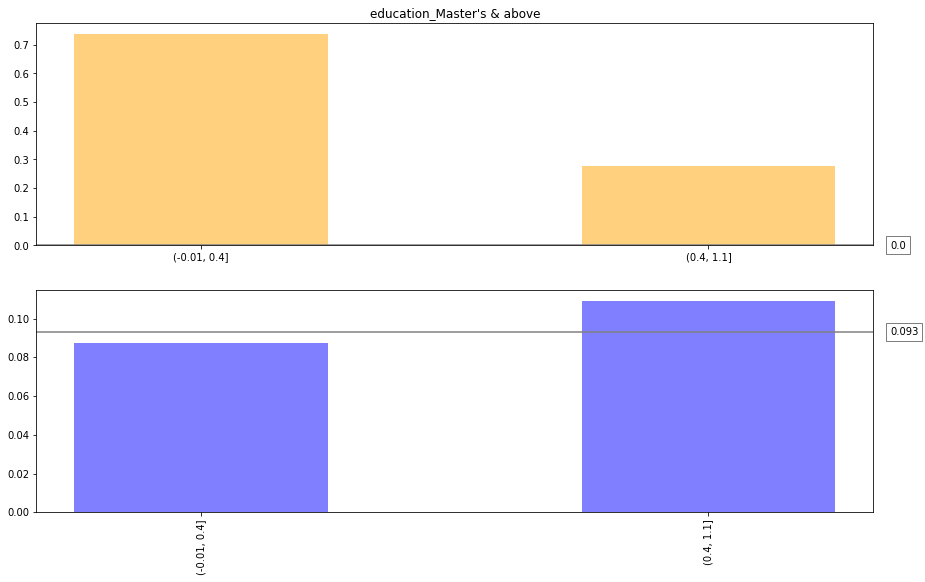

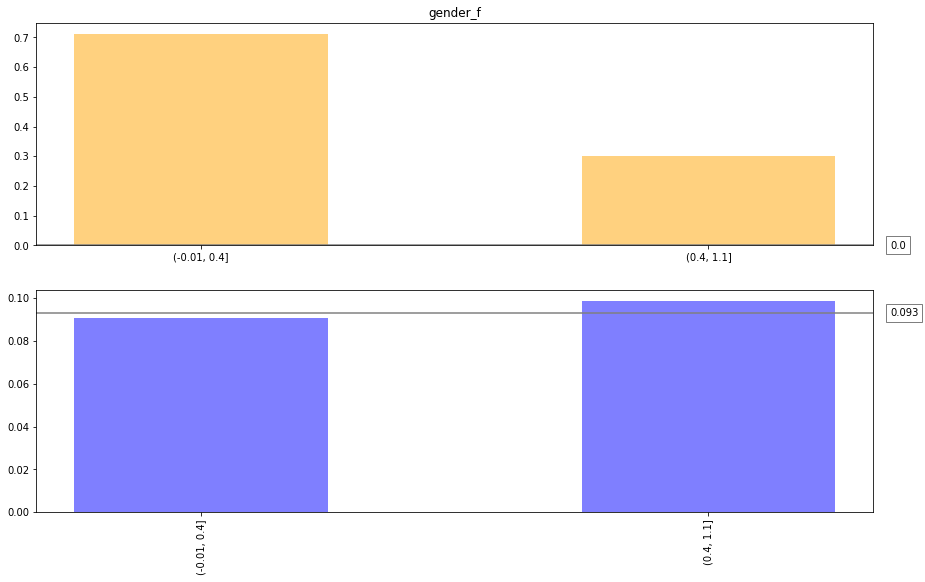

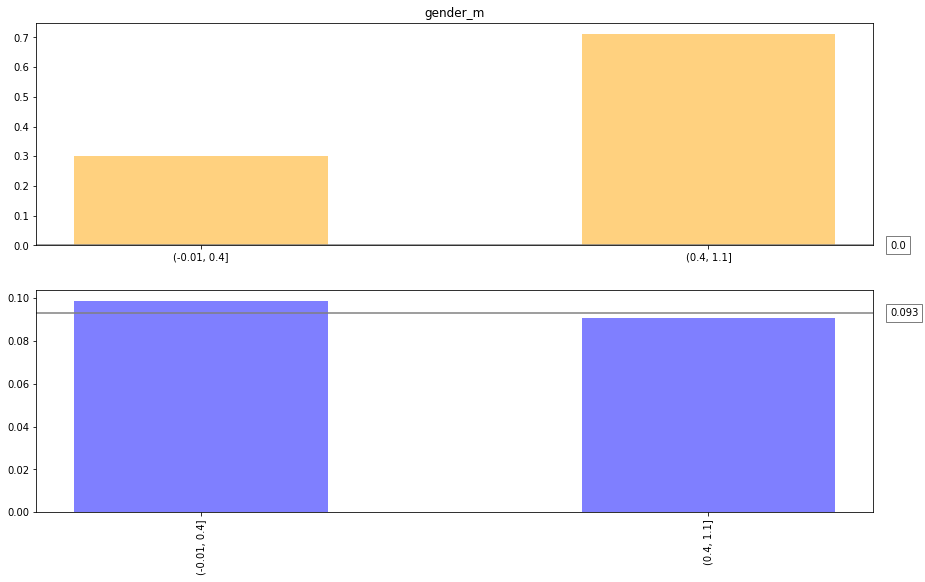

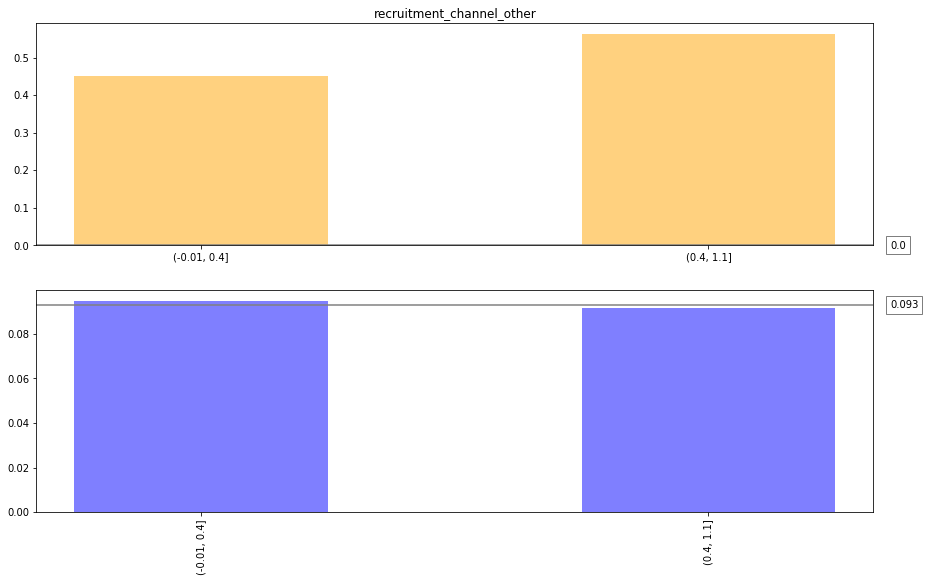

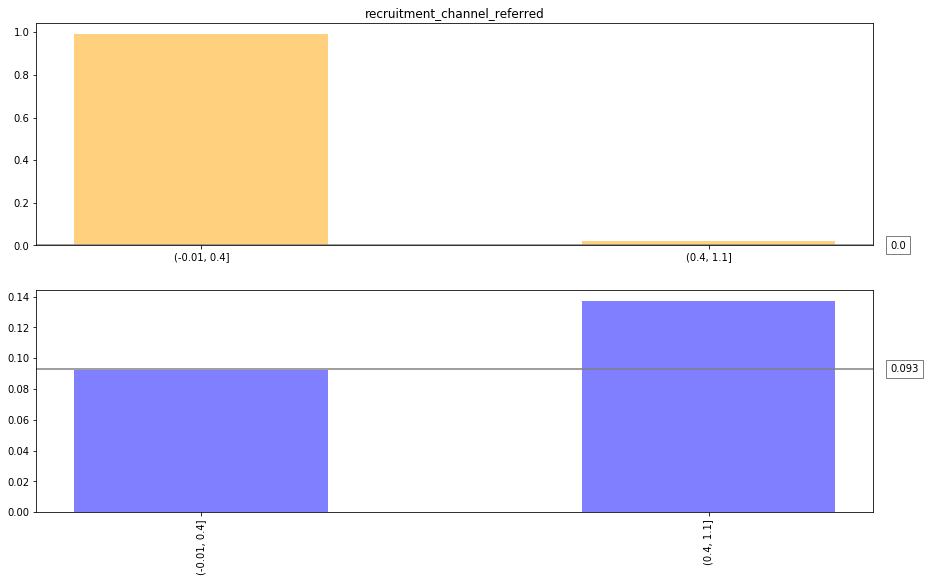

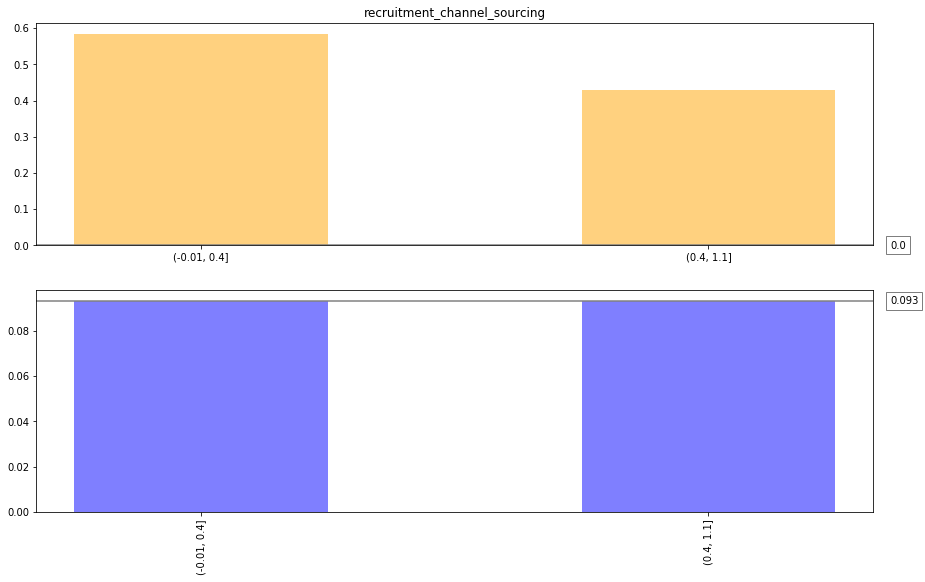

In [77]:
#100 bins
i=10
for col in xnoregion.columns:

    i-=1
    #if i==0:
    #    break
    #plt.style.use('seaborn-white')
    f,ax=plt.subplots(2,1,figsize=(15,9))
    ax[0].set_title(col)
    g=plotsum(xtrainfull,col,'is_promoted',0,1,ax[0])
    g=plotratio(xtrainfull,col,'is_promoted',0,1,ax[1])

In [ ]:
f,ax=plt.subplots(2,1,figsize=(15,9))
ax[0].set_title('rec')
g=plotsum(xtrainfull,col,'is_promoted',0,1,ax[0])
g=plotratio(xtrainfull,col,'is_promoted',0,1,ax[1])

In [ ]:
import test

In [25]:
xtrainfull[xtrainfull['KPIs_met >80%']==1]['is_promoted'].value_counts()

0    16029
1     3262
Name: is_promoted, dtype: int64

In [50]:
ser,quant_bins = pd.qcut(xtrainfull['KPIs_met >80%'],100,retbins=True,labels=False,duplicates='drop')
quant_interval = pd.qcut(xtrainfull['KPIs_met >80%'],100,duplicates='drop').values.categories

In [51]:
quant_bins

array([0., 1.])

In [28]:
quant_interval

IntervalIndex([(-0.001, 1.0]]
              closed='right',
              dtype='interval[float64]')

In [35]:
newbins=list(quant_bins)
old=newbins[1]
newbins[1]=0.5
#newbins.append(old)

In [62]:
pd.IntervalIndex.from_arrays(left,right)

IntervalIndex([(-0.01, 0.4], (0.4, 1.1]]
              closed='right',
              dtype='interval[float64]')

In [44]:
quant_bins=[0,1]

In [58]:
left=np.copy(quant_bins)
left[1]=left[0]+0.4
left[0]=left[0]-0.01

right=np.copy(quant_bins)
right[0]=left[1]
right[1]=right[1]+0.1

In [63]:
l=list(quant_bins)
l.append(l[1]+0.1)
l[1]=l[0]+0.4
quant_bins=np.array(l)
quant_bins

array([0. , 0.4, 1.1])

In [59]:
left

array([-0.01,  0.4 ])

In [60]:
right

array([0.4, 1.1])

In [61]:
quant_bins

array([0., 1.])

In [15]:
import stop

ModuleNotFoundError: No module named 'stop'